# ELEC 576 – Introduction to Deep Learning – Assignment 1

Due: 11:00am 10/04/2017

*On my honor, I have neither given nor received any unauthorized aid on this assignment.*

Daniel LeJeune, S01276871
$\newcommand{\grenewcommand}{\renewcommand} \newcommand{\gnewcommand}{\newcommand}$

# Task 1.

## Part (a).

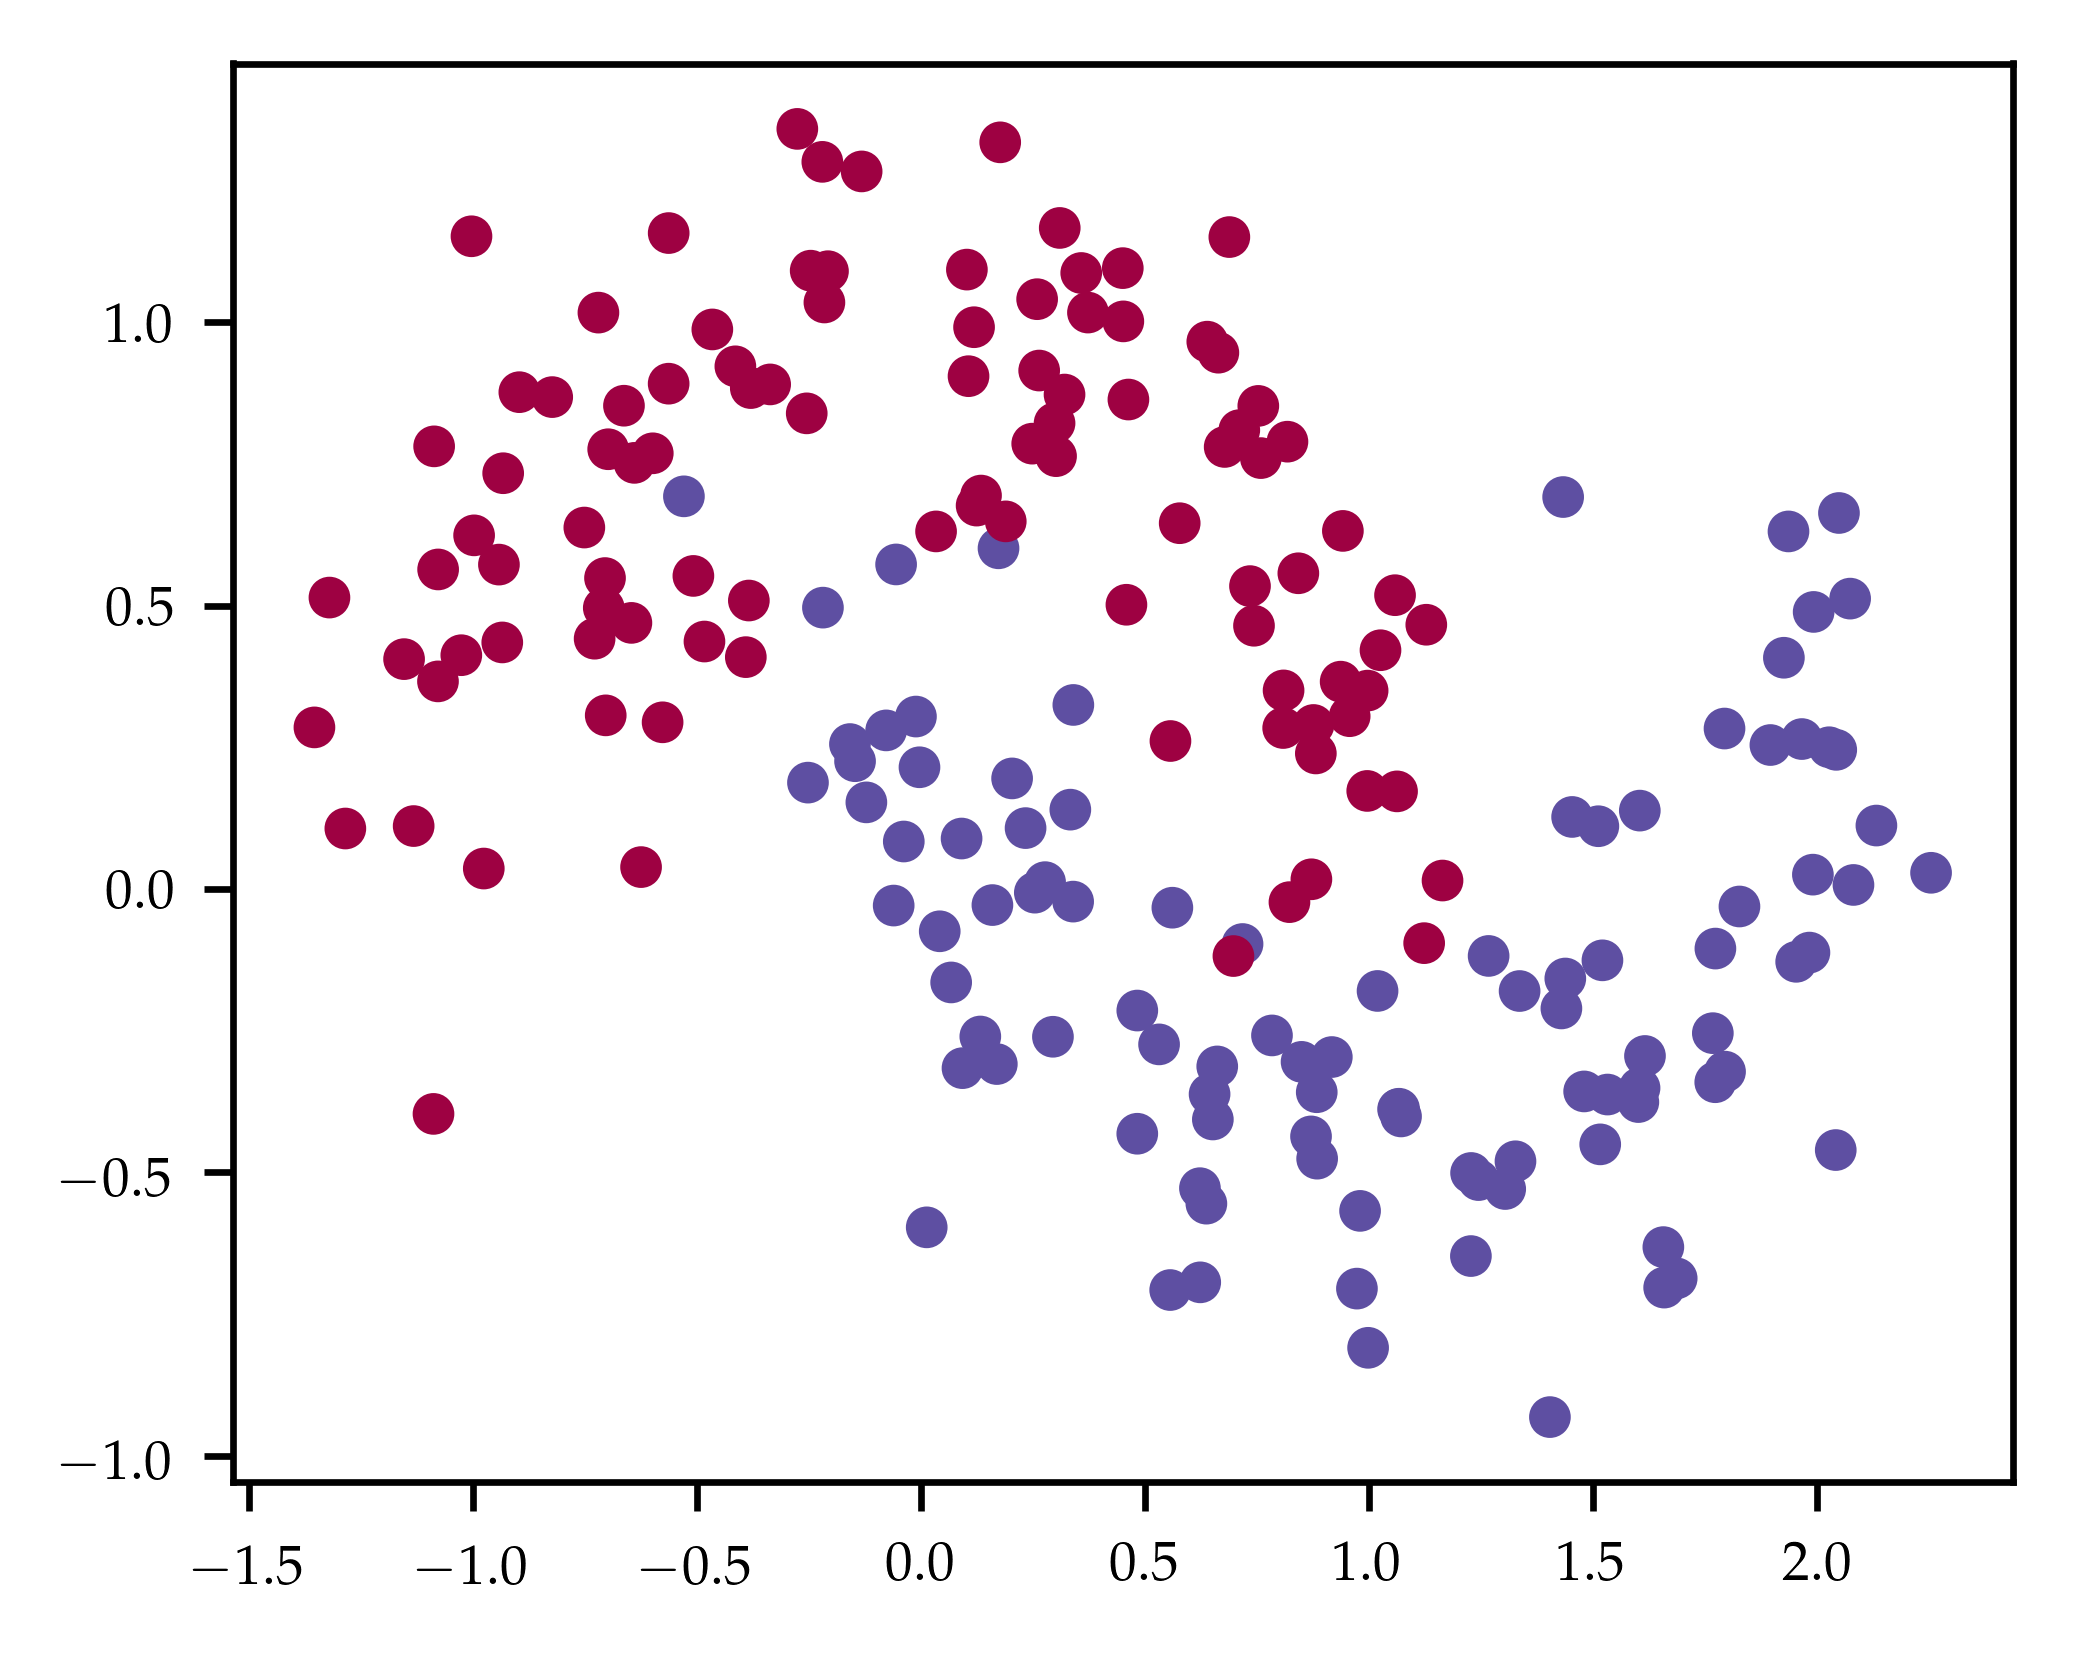

In [1]:
from three_layer_neural_network import generate_data
from matplotlib import pyplot as plt

plt.style.use('notebook')

X, y = generate_data()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.tight_layout()
plt.show()

## Part (b).

### Part (1).

A little algebra shows that

\begin{align*}
    \tanh (x) &= \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
    &= \frac{1 - e^{-2x}}{1 + e^{-2x}} \\
    &= \frac{1}{1 + e^{-2x}} - \frac{e^{-2x}}{1 + e^{-2x}} \\
    &= \frac{1}{1 + e^{-2x}} - \left(1 - \frac{1}{1 + e^{-2x}} \right) \\
    &= 2\sigma(2x) - 1,
\end{align*}

where $\sigma(x)$ is the sigmoid function. I have implemented `actFun()` in `three_layer_neural_network.py` accordingly.

### Part (2).

Using the insight from part (1) above, 

- The derivative of $\tanh (x)$ can be expressed in terms of the derivative of the sigmoid: $\frac{\partial \tanh (x)}{\partial x} = 4 \frac{\partial \sigma (2x)}{\partial x}$.

- The derivative of the sigmoid follows from the power rule:

\begin{align*}
    \frac{\partial \sigma (x)}{\partial x} &= \frac{e^{-x}}{(1 + e^{-x})^2} \\
    &= \frac{1}{(1 + e^{-x})} \frac{e^{-x}}{(1 + e^{-x})} \\
    &= \sigma(x) (1 - \sigma(x))
\end{align*}

- For ReLU, I use a subgradient because of the nondifferentiability at $x = 0$; that is, I choose $g(x) \in \partial f(x)$, where $f$ is the ReLU. Since $f$ has slope 0 for $x < 0$ and slope 1 for $x > 0$, I choose $g(x) = \mathbb{I}(x > 0)$, where $\mathbb{I}(\cdot)$ is the indicator function.

### Part (3).

See `diff_actFun()` in `three_layer_neural_network.py` for implementation.

## Part (c).

### Part (1).

See `feedforward()` in `three_layer_neural_network.py` for implementation.

### Part (2).

See `calculate_loss()` in `three_layer_neural_network.py` for implementation.

## Part (d).

### Part (1).

By the chain rule, it suffices to derive the partial derivatives of each operation performed in the neural network. As much as possible, I do this using matrix calculus notation. I also analyze the derivatives for only a single instance; the total derivatives will simply be the sum of the derivatives for each instance by the linearity of the differential operator. $\grenewcommand{\vec}[1]{\mathbf{#1}} \grenewcommand{\a}{\vec{a}} \grenewcommand{\b}{\vec{b}} \gnewcommand{\q}{\vec{q}} \gnewcommand{\x}{\vec{x}} \gnewcommand{\y}{\vec{y}} \gnewcommand{\z}{\vec{z}} \gnewcommand{\w}{\vec{w}} \gnewcommand{\R}{\mathbb{R}} \gnewcommand{\T}{\mathsf{T}} \gnewcommand{\E}{\mathbb{E}} \grenewcommand{\C}{\mathcal{C}}$

$\left( \frac{\partial L}{\partial \a_2} \right)$. The loss is just a linear combination of a function applied element-wise, so 

$$
    \frac{\partial L}{\partial \a_2} = -\frac{1}{N} \y \circ \mathrm{inv}(\a_2),
$$

where $\y$ is a one-hot encoded vector, $(\cdot \circ \cdot)$ is the element-wise product, and $\mathrm{inv}(\cdot)$ is the element-wise reciprocal.

$\left( \frac{\partial \a_2}{\partial \z_2} \right)$. Let $\q(\z_2) = \exp(\z_2)$, where $\exp(\cdot)$ is applied element-wise. Then $\a_2 = \q / (\mathbf{1}^\T \q)$, where $\mathbf{1}$ denotes a vector where every element is 1. Now

$$
    \frac{\partial \a_2}{\partial \q} = \frac{1}{\mathbf{1}^\T \q} I - \frac{1}{(\mathbf{1}^\T \q)^2} \mathbf{1}\q^\T
$$

and

$$
    \frac{\partial \q}{\partial \z_2} = \mathrm{diag}(\q),
$$

so

\begin{align*}
    \frac{\partial \a_2}{\partial \z_2} &= \frac{1}{\mathbf{1}^\T \q} \mathrm{diag}(\q) - \frac{1}{(\mathbf{1}^\T \q)^2} \q\q^\T \\
    &= \mathrm{diag}(\a_2) - \a_2 \a_2^\T.
\end{align*}

$\left( \frac{\partial \z_2}{\partial \a_1} \right)$. This is a simple linear operation. $\frac{\partial \z_2}{\partial \a_1} = W_2^\T$.

$\left( \frac{\partial \z_2}{\partial W_2} \right)$. Consider single columns $\w_j$ of $W_2$. Then $\z_2 = \sum_j (\a_1)_j \w_j + b_2$, so

$$
    \frac{\partial \z_2}{\partial \w_j} = (\a_1)_j I.
$$

$\left( \frac{\partial \z_2}{\partial \b_2} \right)$. This is a also a simple linear operation. $\frac{\partial \z_2}{\partial \b_2} = I$.

$\left( \frac{\partial \a_1}{\partial \z_1} \right)$. This is a simple element-wise operation. $\frac{\partial \a_1}{\partial \z_1} = \mathrm{diag}\left( \left(\frac{\partial \mathrm{actFun}((\z_1)_i)}{\partial (\z_1)_i}\right)_{i=1}^n \right)$.

$\left( \frac{\partial \z_1}{\partial W_1} \right)$. See $\frac{\partial \z_2}{\partial W_2}$ above, and substitute $\x$ for $\a_1$.

$\left( \frac{\partial \z_1}{\partial \b_1} \right)$. See $\frac{\partial \z_2}{\partial \b_2}$ above.

To compute the partial derivatives, subsitute the values above as follows: 

\begin{align*}
    \left( \frac{\partial L}{\partial W_2} \right)_{:,j} &= (\a_1)_j \frac{\partial \a_2}{\partial \z_2} \frac{\partial L}{\partial \a_2} \\
    \frac{\partial L}{\partial W_2} &= \left( \frac{\partial \a_2}{\partial \z_2} \frac{\partial L}{\partial \a_2} \right) \a_1^\T
\end{align*}

$$
    \frac{\partial L}{\partial \b_2} = \frac{\partial \a_2}{\partial \z_2} \frac{\partial L}{\partial \a_2}
$$

$$
    \frac{\partial L}{\partial W_1} = \left( \frac{\partial \a_1}{\partial \z_1} \frac{\partial \z_2}{\partial \a_1} \frac{\partial \a_2}{\partial \z_2} \frac{\partial L}{\partial \a_2} \right) \x^\T
$$

$$
    \frac{\partial L}{\partial \b_1} = \frac{\partial \a_1}{\partial \z_1} \frac{\partial \z_2}{\partial \a_1} \frac{\partial \a_2}{\partial \z_2} \frac{\partial L}{\partial \a_2},
$$

and sum accross instances for the complete partial derivatives.

### Part (2).

See `backprop()` in `three_layer_neural_network.py` for implementation.

## Part (e).

### Part (1).

Loss after iteration 0: 0.582899
Loss after iteration 1000: 0.327102
Loss after iteration 2000: 0.306491
Loss after iteration 3000: 0.300981
Loss after iteration 4000: 0.295885
Loss after iteration 5000: 0.289264
Loss after iteration 6000: 0.280672
Loss after iteration 7000: 0.270248
Loss after iteration 8000: 0.258542
Loss after iteration 9000: 0.246241
Loss after iteration 10000: 0.233966
Loss after iteration 11000: 0.222174
Loss after iteration 12000: 0.211141
Loss after iteration 13000: 0.200995
Loss after iteration 14000: 0.191746
Loss after iteration 15000: 0.183330
Loss after iteration 16000: 0.175625
Loss after iteration 17000: 0.168472
Loss after iteration 18000: 0.161684
Loss after iteration 19000: 0.155086
Loss after iteration 0: 0.656433
Loss after iteration 1000: 0.508830
Loss after iteration 2000: 0.403524
Loss after iteration 3000: 0.353899
Loss after iteration 4000: 0.331607
Loss after iteration 5000: 0.320647
Loss after iteration 6000: 0.314825
Loss after iteration 700

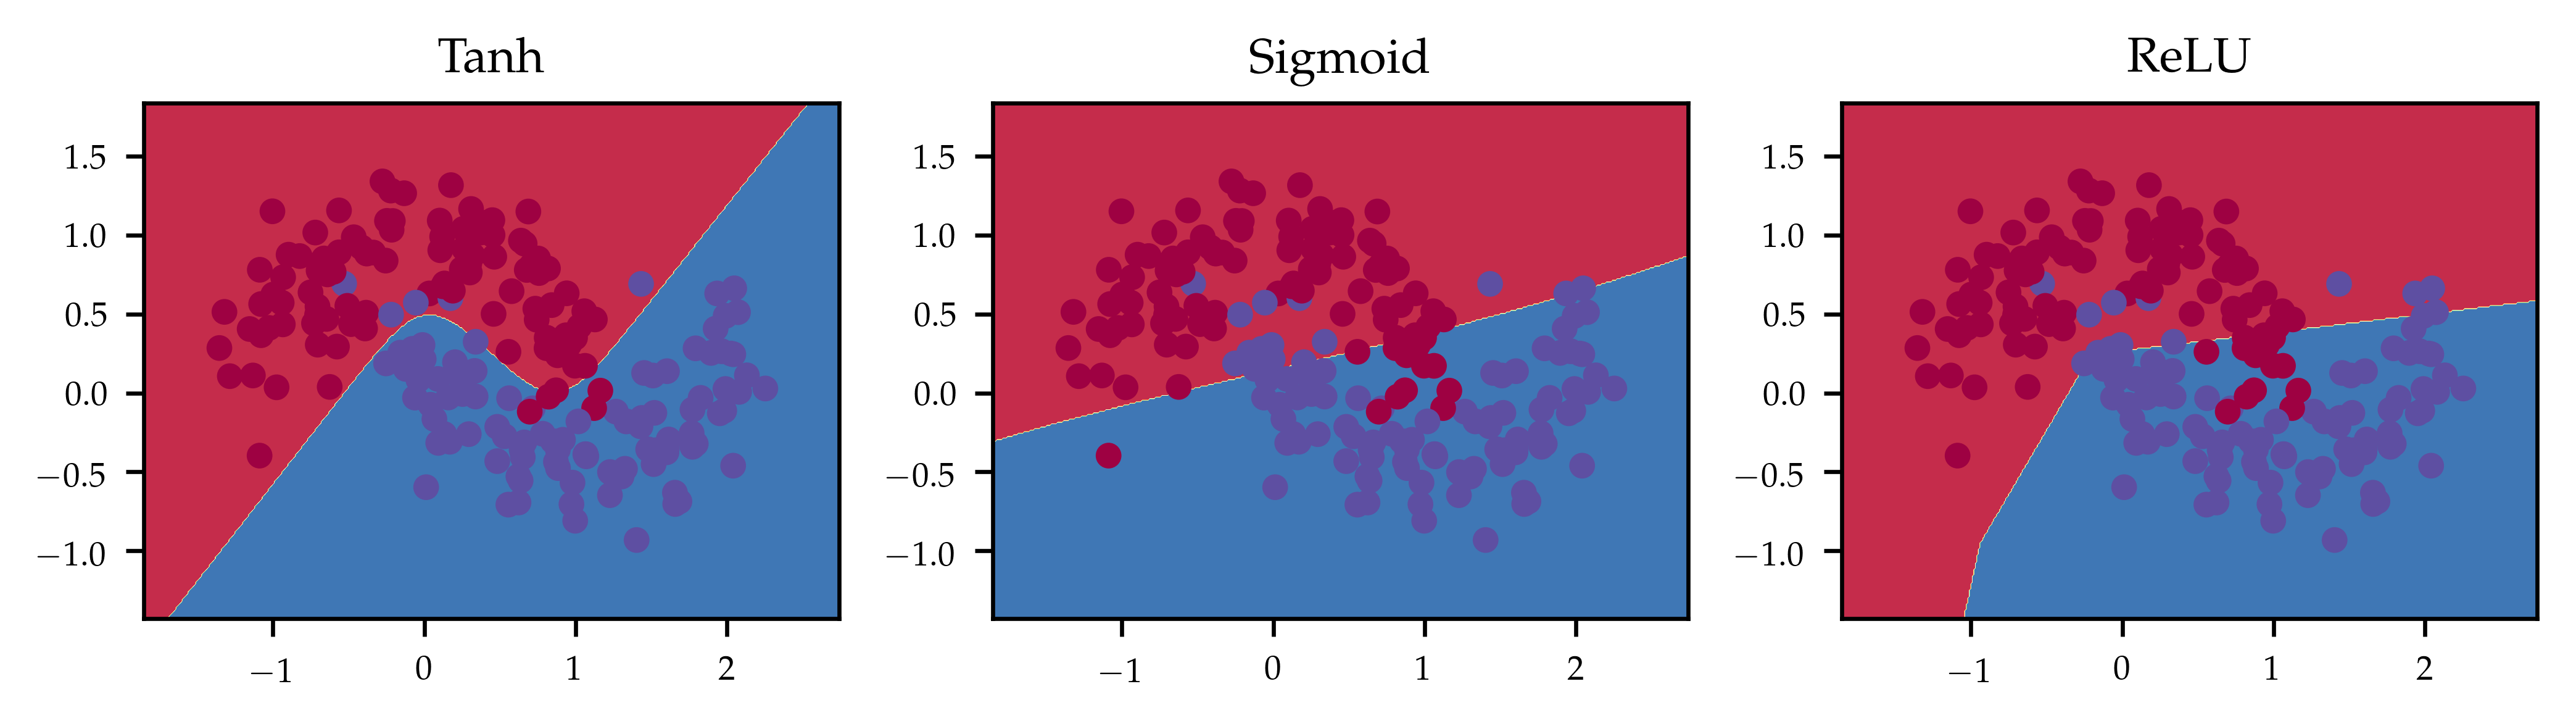

In [2]:
from three_layer_neural_network import NeuralNetwork

activation_functions = ['Tanh', 'Sigmoid', 'ReLU']

plt.figure(figsize=(7, 2))

for i, activation_function in enumerate(activation_functions):
    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=3, nn_output_dim=2, actFun_type=activation_function, reg_lambda=1e-2/200)
    model.fit_model(X, y)
    
    plt.subplot(1, len(activation_functions), i+1)
    model.visualize_decision_boundary(X, y)
    plt.title(activation_function)
    
plt.tight_layout()
plt.show()

Both Tanh and Sigmoid activations provide a smooth decision boundary, but Tanh converged much faster than Sigmoid, which is to be expected due to the steeper gradients and less need to optimize biases. ReLU provides a jagged decision boundary, which matches its piecewise-linear structure.

### Part (2).

Loss after iteration 0: 0.611537
Loss after iteration 1000: 0.326946
Loss after iteration 2000: 0.305651
Loss after iteration 3000: 0.294757
Loss after iteration 4000: 0.284364
Loss after iteration 5000: 0.271222
Loss after iteration 6000: 0.254558
Loss after iteration 7000: 0.235645
Loss after iteration 8000: 0.216494
Loss after iteration 9000: 0.198606
Loss after iteration 10000: 0.182749
Loss after iteration 11000: 0.169152
Loss after iteration 12000: 0.157710
Loss after iteration 13000: 0.148159
Loss after iteration 14000: 0.140187
Loss after iteration 15000: 0.133497
Loss after iteration 16000: 0.127835
Loss after iteration 17000: 0.122994
Loss after iteration 18000: 0.118811
Loss after iteration 19000: 0.115158
Loss after iteration 0: 0.583248
Loss after iteration 1000: 0.309264
Loss after iteration 2000: 0.294630
Loss after iteration 3000: 0.280724
Loss after iteration 4000: 0.263982
Loss after iteration 5000: 0.244667
Loss after iteration 6000: 0.224535
Loss after iteration 700

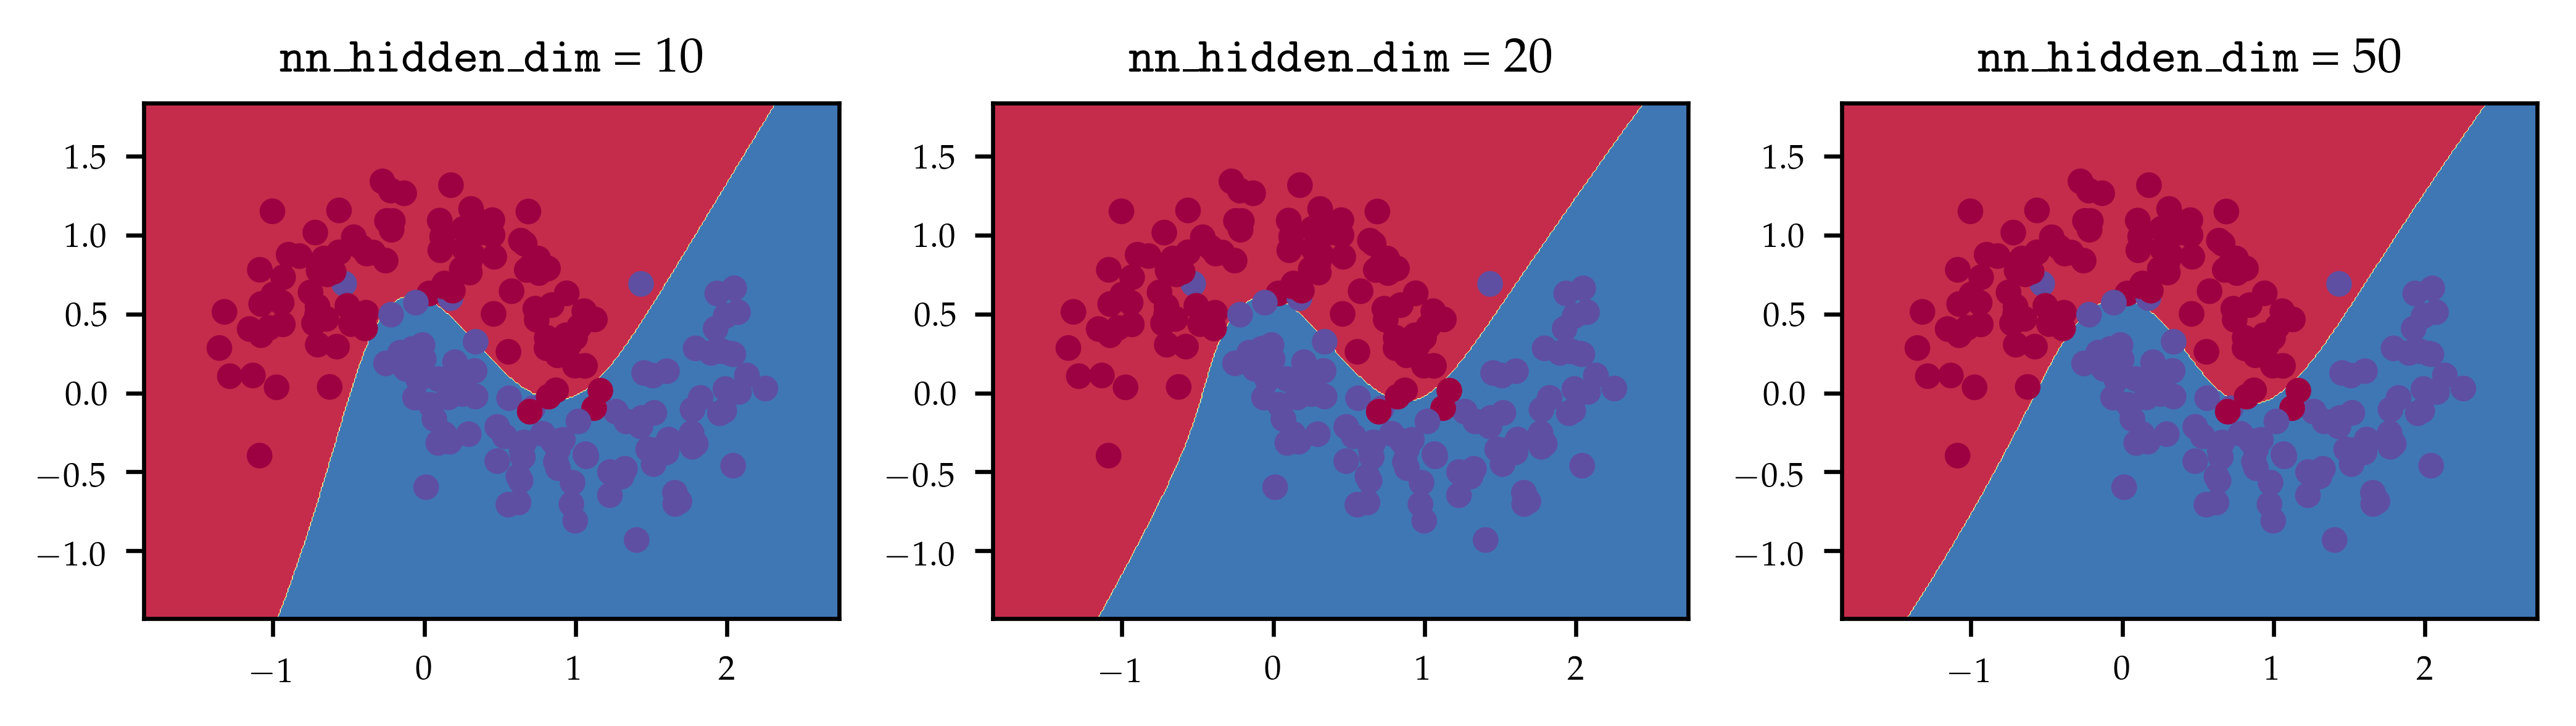

In [3]:
nn_hidden_dims = [10, 20, 50]
tanh_models = {}

plt.figure(figsize=(7, 2))

for i, nn_hidden_dim in enumerate(nn_hidden_dims):
    model = NeuralNetwork(nn_input_dim=2, nn_hidden_dim=nn_hidden_dim, nn_output_dim=2, actFun_type='Tanh', reg_lambda=1e-2/200)
    model.fit_model(X, y)
    
    plt.subplot(1, len(nn_hidden_dims), i+1)
    model.visualize_decision_boundary(X, y)
    plt.title(r'\texttt{nn\_hidden\_dim} = %d' % nn_hidden_dim)
    
    tanh_models[nn_hidden_dim] = model

plt.tight_layout()
plt.show()

The decision boundaries are slightly more complex in some of these wider networks, but overall they are very similar to that of the 3-hidden-unit network. I would have expected more overfitting, but this has not happened, probably due to regularization.

## Part (f).

See `n_layer_neural_network.py` for my implementation.

Loss after iteration 0: 0.562289
Loss after iteration 1000: 0.274087
Loss after iteration 2000: 0.147562
Loss after iteration 3000: 0.096725
Loss after iteration 4000: 0.080639
Loss after iteration 0: 0.551033
Loss after iteration 1000: 0.082701
Loss after iteration 2000: 0.072533
Loss after iteration 3000: 0.067756
Loss after iteration 4000: 0.065147
Loss after iteration 0: 0.677365
Loss after iteration 1000: 0.119163
Loss after iteration 2000: 0.077004
Loss after iteration 3000: 0.055265
Loss after iteration 4000: 0.056825
Loss after iteration 0: 0.704069
Loss after iteration 1000: 0.190705
Loss after iteration 2000: 0.113186
Loss after iteration 3000: 0.091071
Loss after iteration 4000: 0.081957
Loss after iteration 0: 0.682145
Loss after iteration 1000: 0.070312
Loss after iteration 2000: 0.058389
Loss after iteration 3000: 0.052160
Loss after iteration 4000: 0.047049
Loss after iteration 0: 0.701078
Loss after iteration 1000: 0.061829
Loss after iteration 2000: 0.054370
Loss after

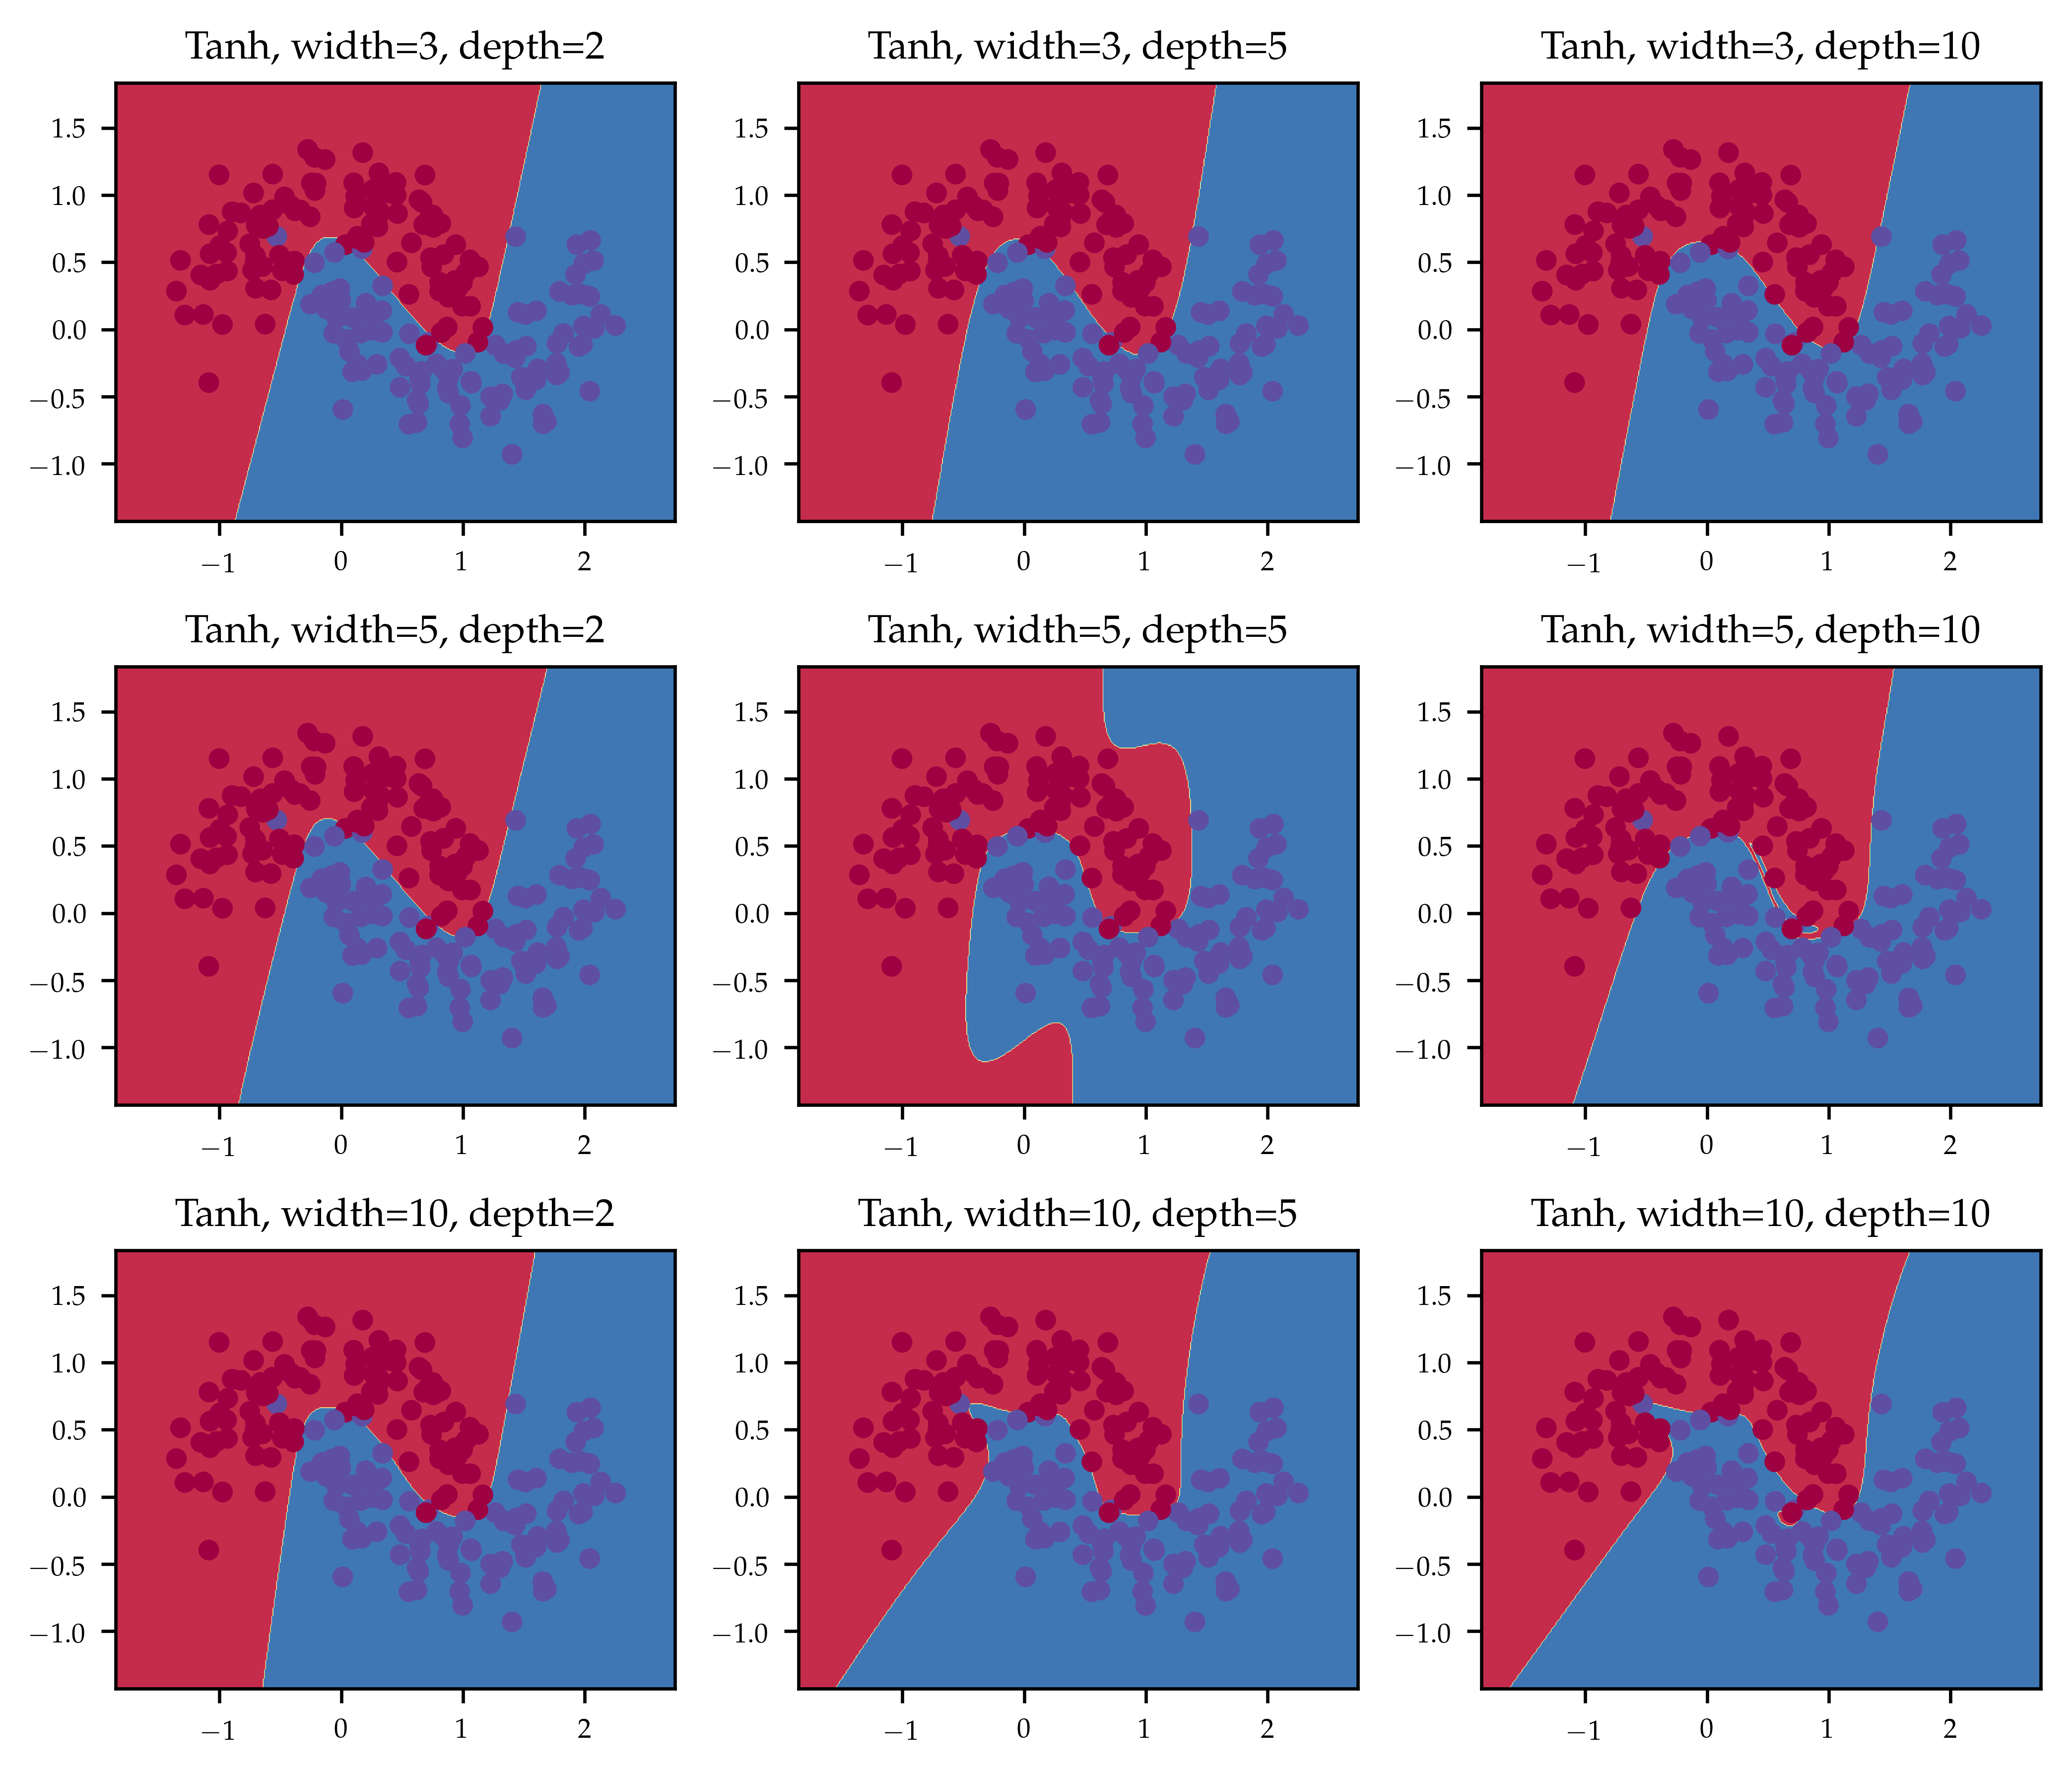

Loss after iteration 0: 0.656364
Loss after iteration 1000: 0.310287
Loss after iteration 2000: 0.307262
Loss after iteration 3000: 0.305940
Loss after iteration 4000: 0.304955
Loss after iteration 0: 0.950787
Loss after iteration 1000: 0.684935
Loss after iteration 2000: 0.569793
Loss after iteration 3000: 0.321450
Loss after iteration 4000: 0.306945
Loss after iteration 0: 0.711956
Loss after iteration 1000: 0.693301
Loss after iteration 2000: 0.693300
Loss after iteration 3000: 0.693300
Loss after iteration 4000: 0.693300
Loss after iteration 0: 0.724797
Loss after iteration 1000: 0.304875
Loss after iteration 2000: 0.297445
Loss after iteration 3000: 0.277095
Loss after iteration 4000: 0.235014
Loss after iteration 0: 0.693654
Loss after iteration 1000: 0.692856
Loss after iteration 2000: 0.692051
Loss after iteration 3000: 0.689296
Loss after iteration 4000: 0.657131
Loss after iteration 0: 0.713565
Loss after iteration 1000: 0.693392
Loss after iteration 2000: 0.693391
Loss after

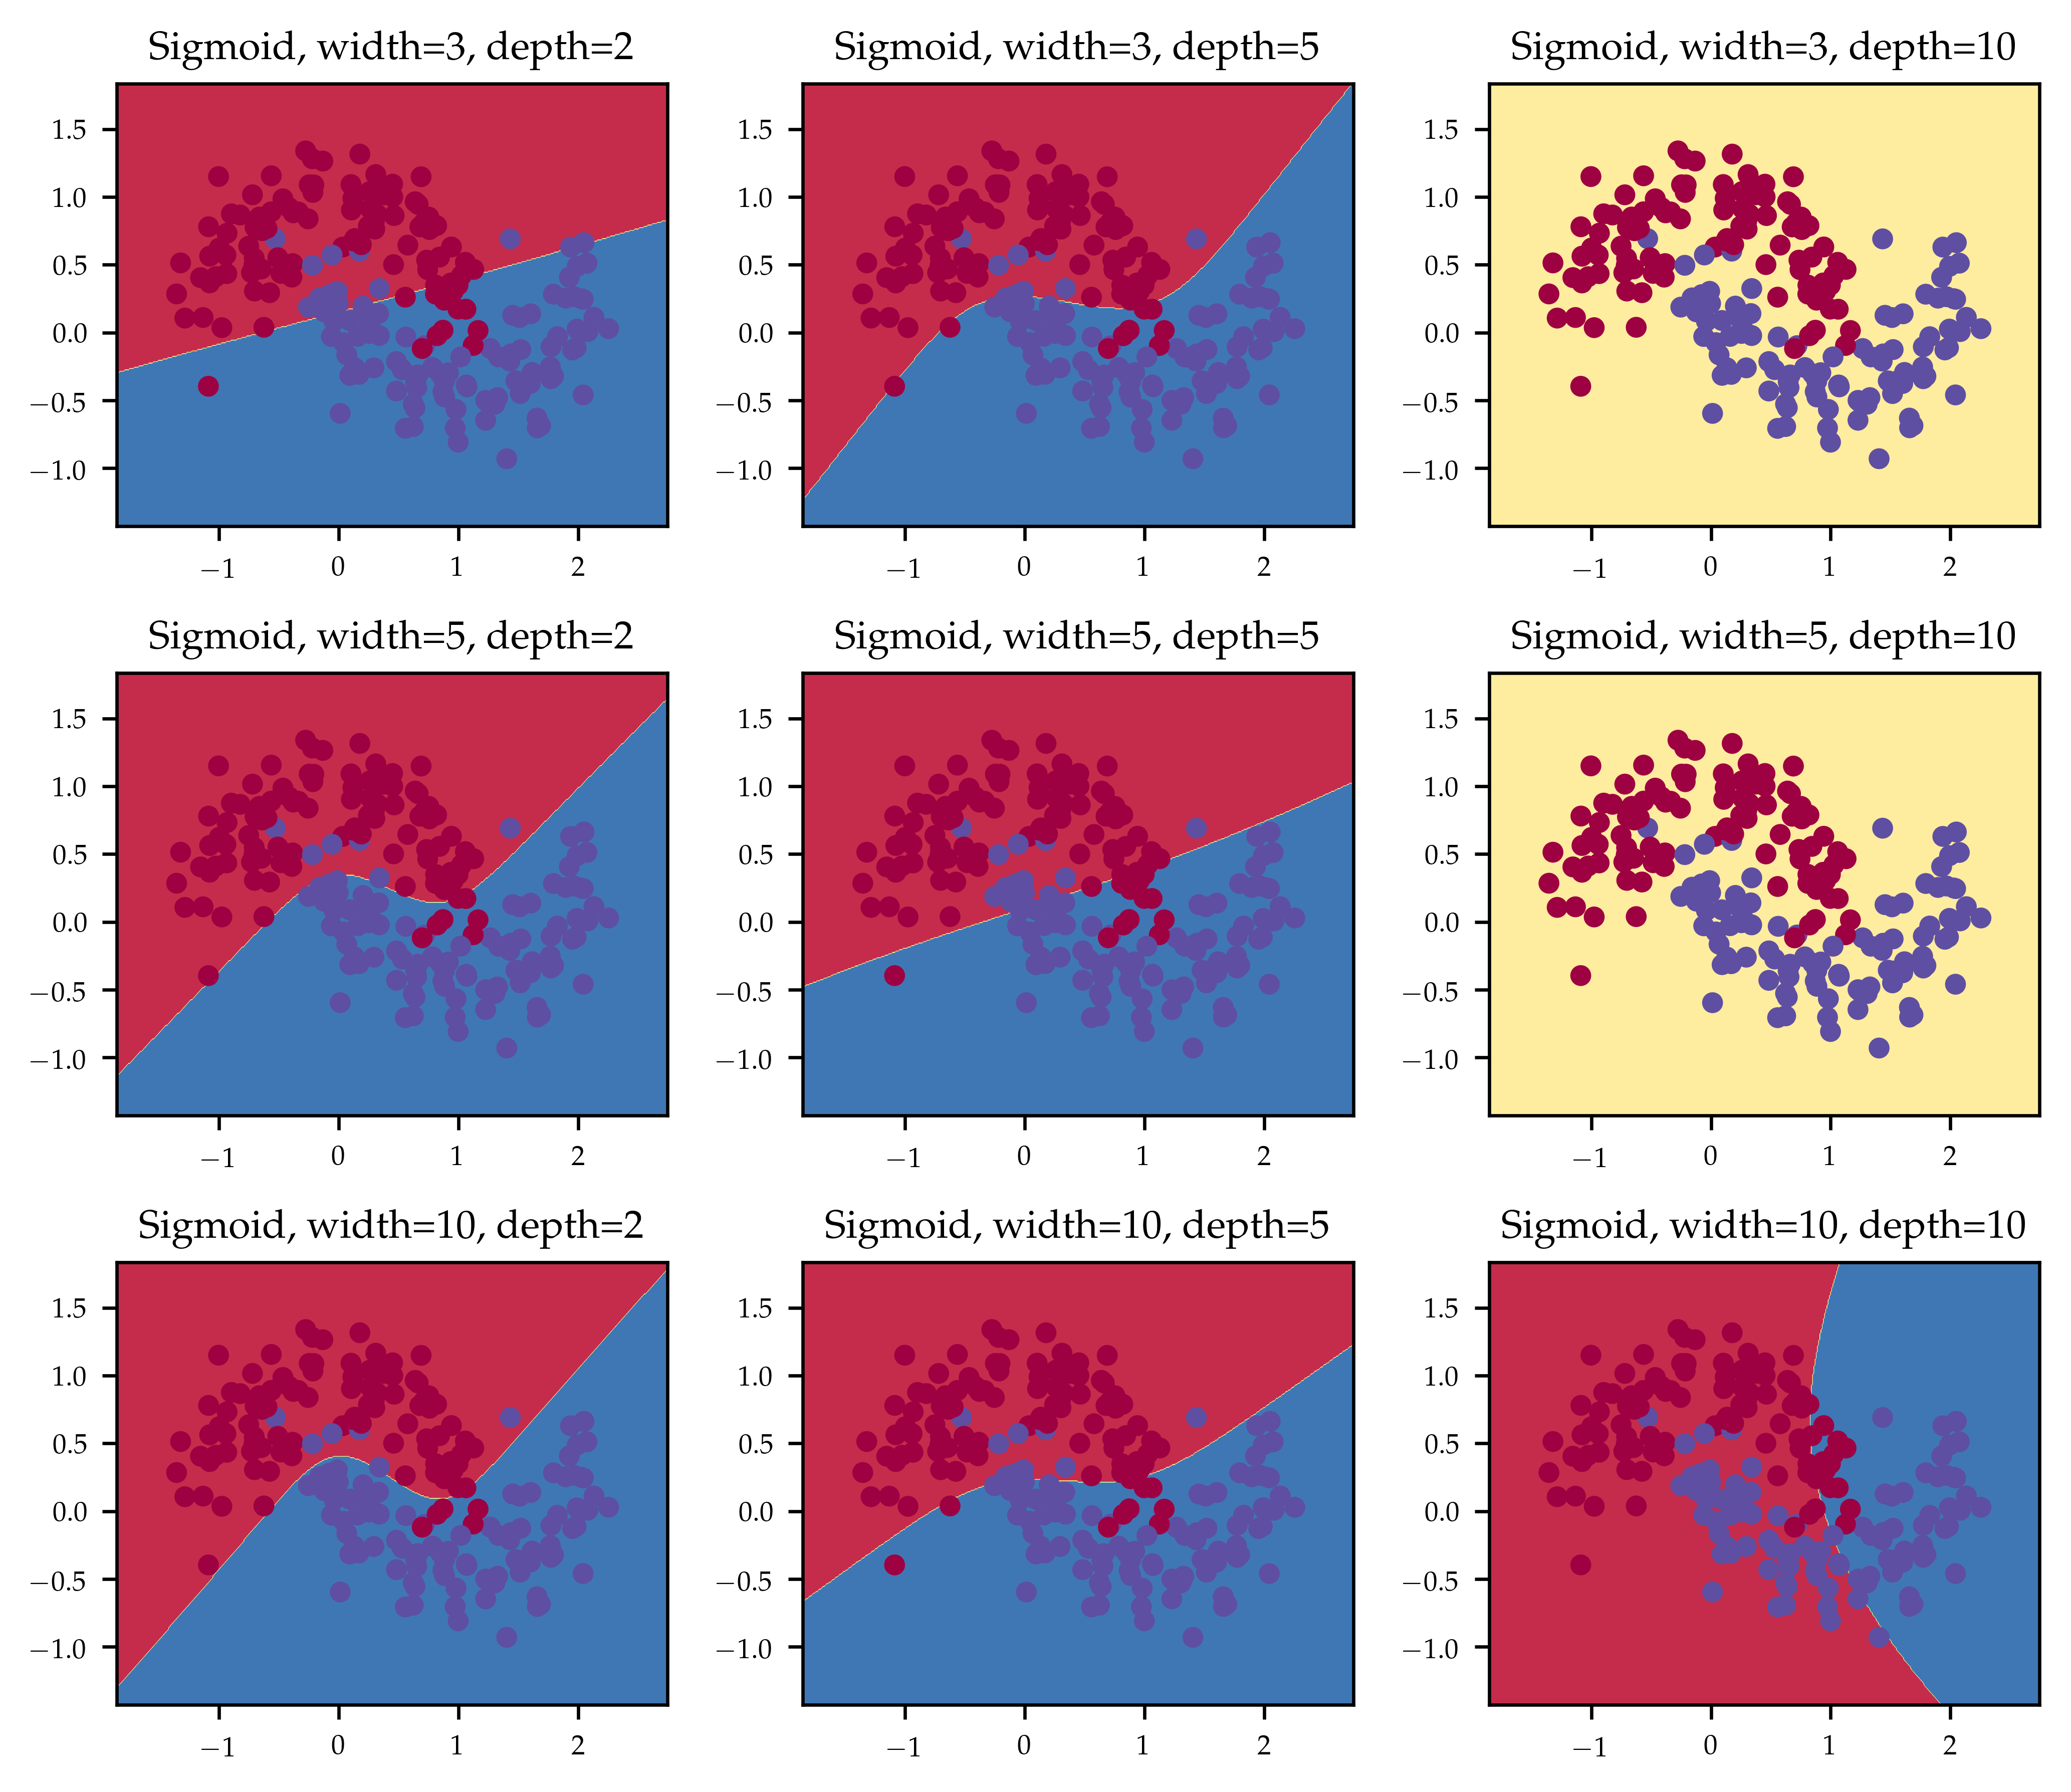

Loss after iteration 0: 0.577406
Loss after iteration 1000: 0.280828
Loss after iteration 2000: 0.272804
Loss after iteration 3000: 0.270168
Loss after iteration 4000: 0.268734
Loss after iteration 0: 0.580679
Loss after iteration 1000: 0.072518
Loss after iteration 2000: 0.050269
Loss after iteration 3000: 0.055909
Loss after iteration 4000: 0.033198
Loss after iteration 0: 0.693302
Loss after iteration 1000: 0.693301
Loss after iteration 2000: 0.693301
Loss after iteration 3000: 0.693301
Loss after iteration 4000: 0.693300
Loss after iteration 0: 0.732216
Loss after iteration 1000: 0.259056
Loss after iteration 2000: 0.145392
Loss after iteration 3000: 0.107860
Loss after iteration 4000: 0.096729
Loss after iteration 0: 0.696162
Loss after iteration 1000: 0.188657
Loss after iteration 2000: 0.187549
Loss after iteration 3000: 0.086239
Loss after iteration 4000: 0.081431
Loss after iteration 0: 0.693526
Loss after iteration 1000: 0.076683
Loss after iteration 2000: 0.068651
Loss after

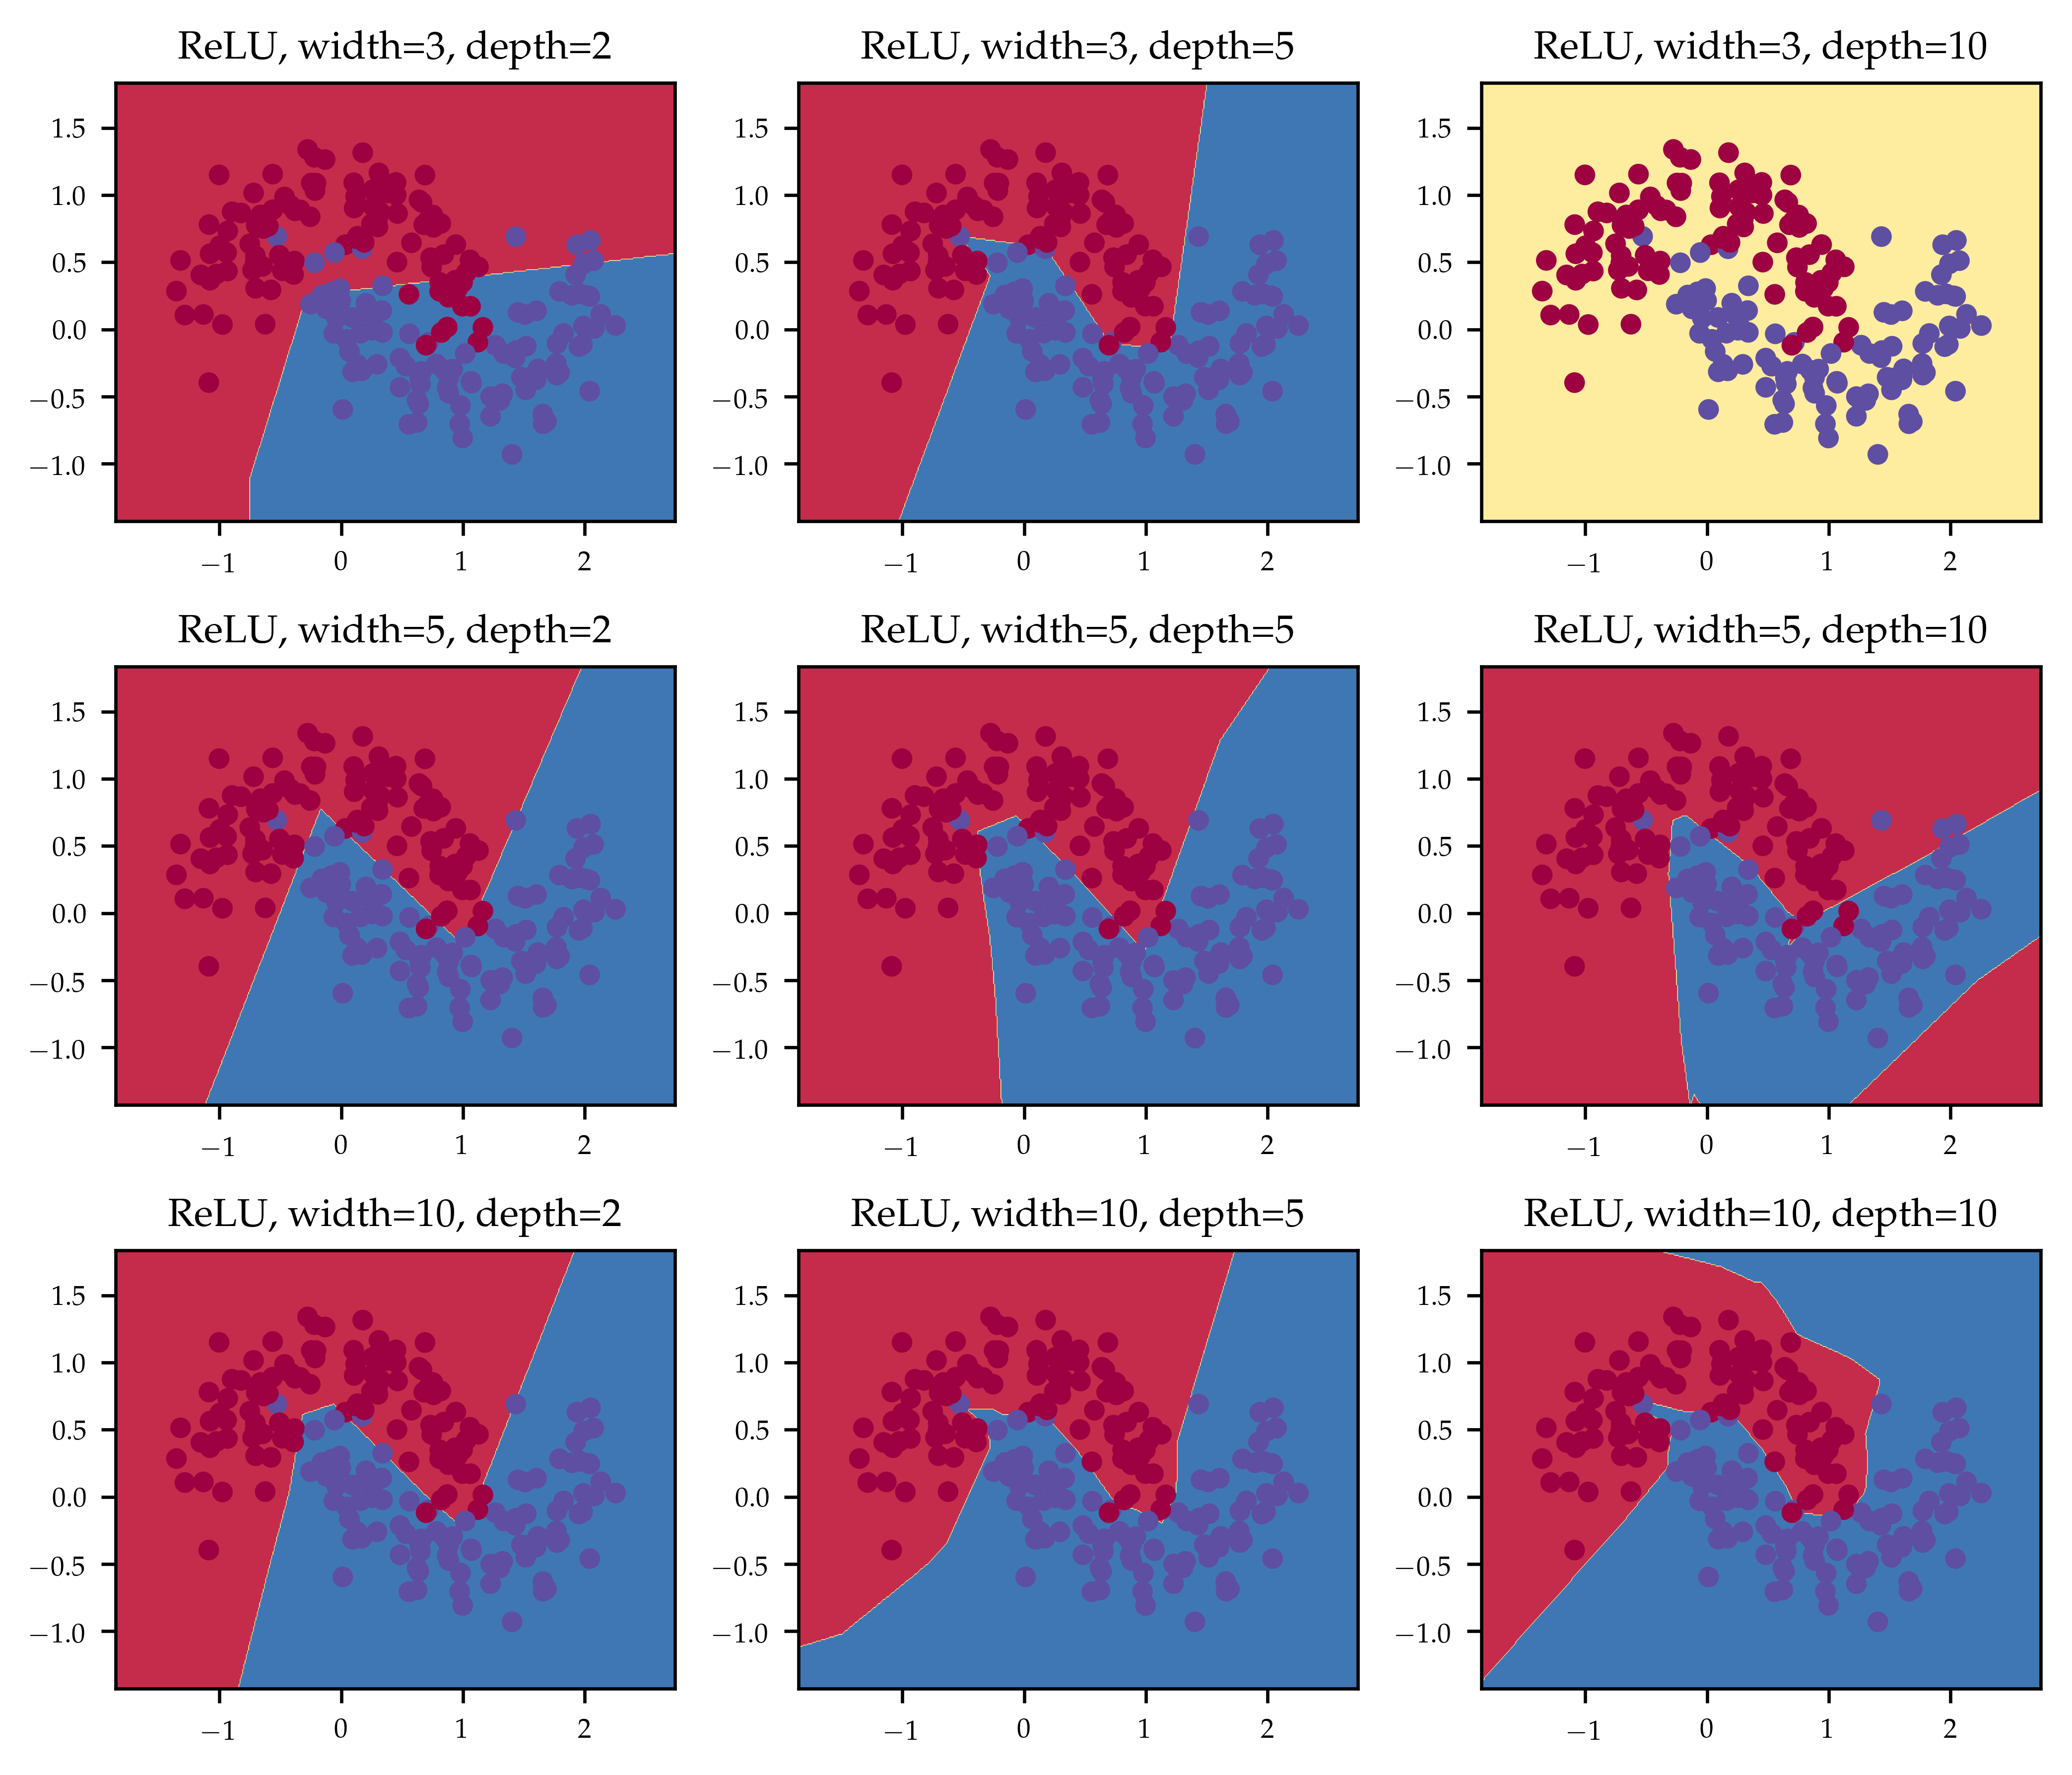

In [4]:
from itertools import product
import numpy as np

from n_layer_neural_network import DeepNeuralNetwork, ActivationFunctions, Losses
from three_layer_neural_network import plot_decision_boundary

activations = ['Tanh', 'Sigmoid', 'ReLU']
layer_widths = [3, 5, 10]
depths = [2, 5, 10]

for k, activation in enumerate(activations):
    
    if activation == 'Tanh':
        activation_cls = ActivationFunctions.Tanh
    elif activation == 'Sigmoid':
        activation_cls = ActivationFunctions.Sigmoid
    elif activation == 'ReLU':
        activation_cls = ActivationFunctions.ReLU
        
    plt.figure(figsize=(7, 6))
    
    for (i, layer_width), (j, depth) in product(enumerate(layer_widths), enumerate(depths)):
        model = DeepNeuralNetwork(input_dim=2, layer_specs=[(layer_width, activation_cls()) for _ in range(depth-1)] + [(2, ActivationFunctions.Softmax())], loss=Losses.CrossEntropy(), reg_penalty=1e-5, seed=0)
        model.train(X, y, step_size=1e-1, epochs=5000, verbose=True)
        
        plt.subplot(len(layer_widths), len(depths), i*len(depths)+j+1)
        plot_decision_boundary(lambda X: np.argmax(model.feedforward(X), 1), X, y)
        plt.title('%s, width=%d, depth=%d' % (activation, layer_width, depth))
                    
    plt.tight_layout()
    plt.show()

The sigmoid networks seemed to have difficulty training altogether, probably for similar reasons as above. However, both the tanh and ReLU nets were able to learn good decision boundaries, although both of these nets started to overfit as depth increased, with ReLU nets overfitting sooner than tanh nets. Additionally, the deep narrow nets with sigmoid and ReLU activations produced constant-valued prediction functions (see the yellow-background plots above), probably due to a combination of vanishing gradients and strong regularization.

Loss after iteration 0: 1.200017
Loss after iteration 1000: 0.529727
Loss after iteration 2000: 0.418504
Loss after iteration 3000: 0.365111
Loss after iteration 4000: 0.328764
Loss after iteration 0: 1.098858
Loss after iteration 1000: 0.166215
Loss after iteration 2000: 0.043750
Loss after iteration 3000: 0.012880
Loss after iteration 4000: 0.006708
Loss after iteration 0: 1.102424
Loss after iteration 1000: 0.108029
Loss after iteration 2000: 0.030070
Loss after iteration 3000: 0.004552
Loss after iteration 4000: 0.002900
Loss after iteration 0: 1.196474
Loss after iteration 1000: 0.400434
Loss after iteration 2000: 0.269995
Loss after iteration 3000: 0.218300
Loss after iteration 4000: 0.188604
Loss after iteration 0: 1.107405
Loss after iteration 1000: 0.034939
Loss after iteration 2000: 0.010620
Loss after iteration 3000: 0.005280
Loss after iteration 4000: 0.003463
Loss after iteration 0: 1.105068
Loss after iteration 1000: 0.050228
Loss after iteration 2000: 0.003650
Loss after

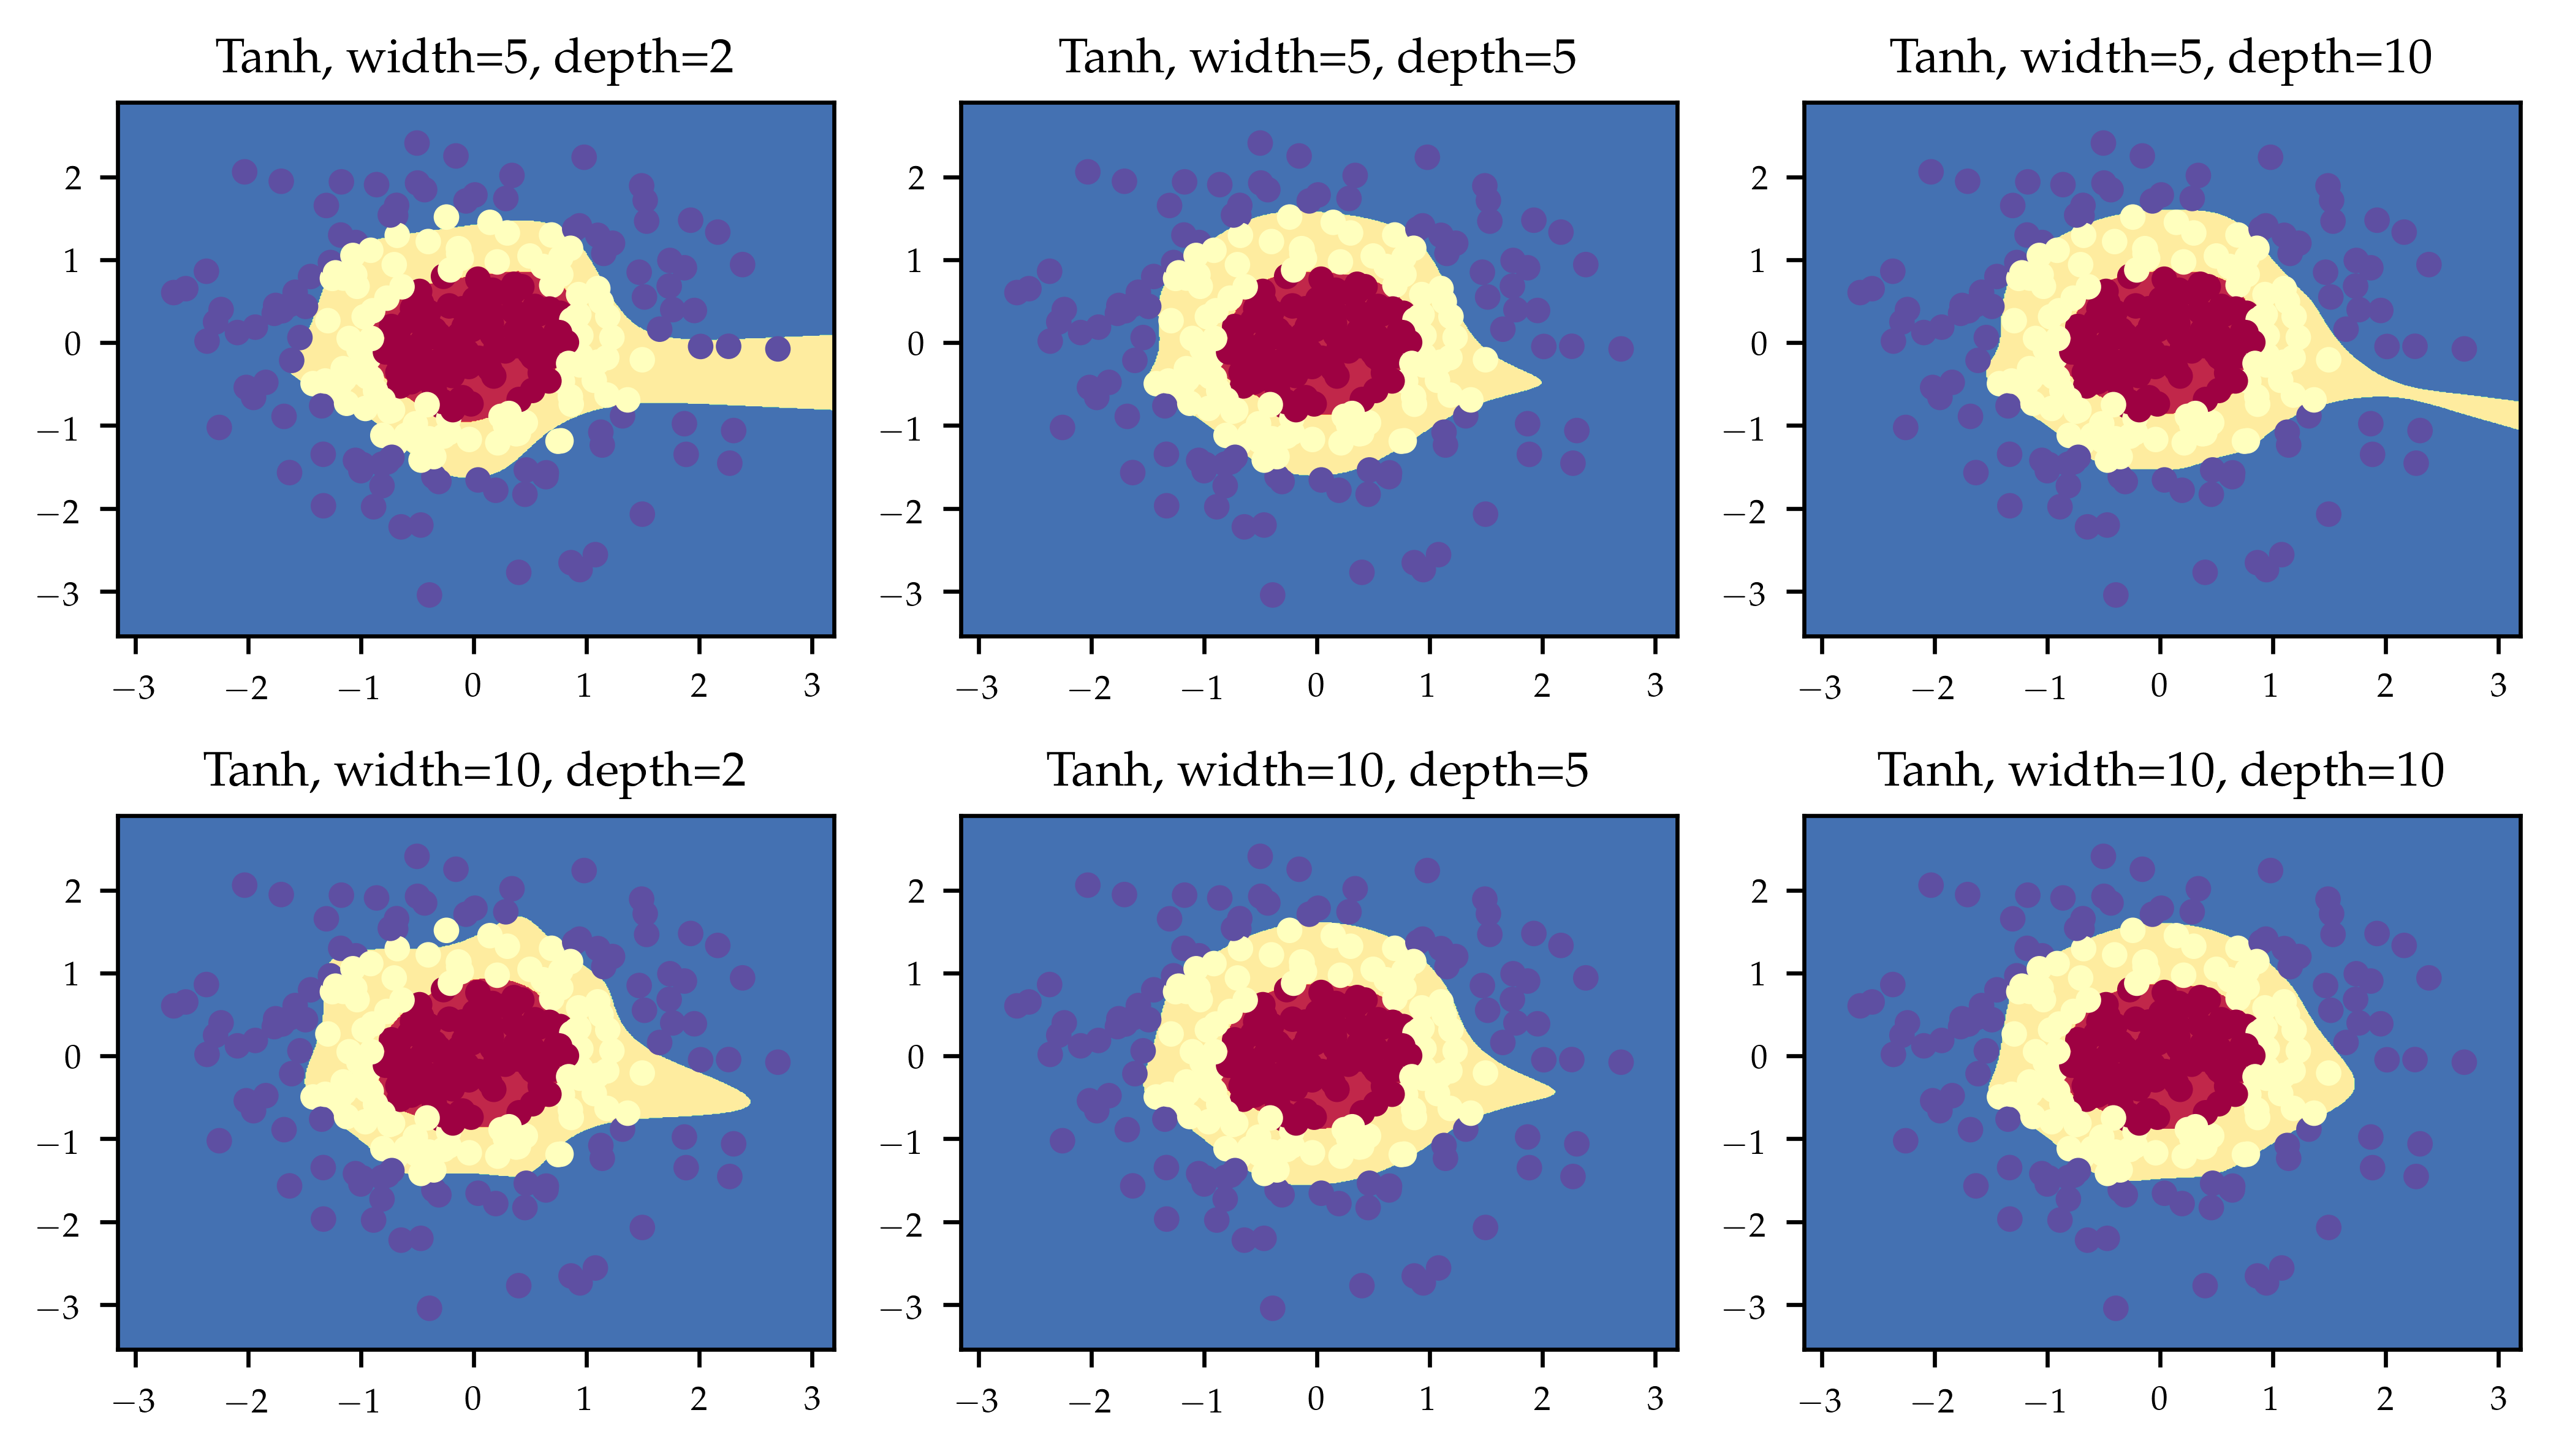

Loss after iteration 0: 1.127900
Loss after iteration 1000: 0.972916
Loss after iteration 2000: 0.664777
Loss after iteration 3000: 0.531164
Loss after iteration 4000: 0.469767
Loss after iteration 0: 1.102812
Loss after iteration 1000: 1.098731
Loss after iteration 2000: 1.098728
Loss after iteration 3000: 1.098725
Loss after iteration 4000: 1.098722
Loss after iteration 0: 1.184295
Loss after iteration 1000: 1.098859
Loss after iteration 2000: 1.098859
Loss after iteration 3000: 1.098858
Loss after iteration 4000: 1.098858
Loss after iteration 0: 1.195123
Loss after iteration 1000: 0.910101
Loss after iteration 2000: 0.584817
Loss after iteration 3000: 0.451174
Loss after iteration 4000: 0.379131
Loss after iteration 0: 1.113018
Loss after iteration 1000: 1.098787
Loss after iteration 2000: 1.098760
Loss after iteration 3000: 1.098731
Loss after iteration 4000: 1.098698
Loss after iteration 0: 1.107491
Loss after iteration 1000: 1.099070
Loss after iteration 2000: 1.099069
Loss after

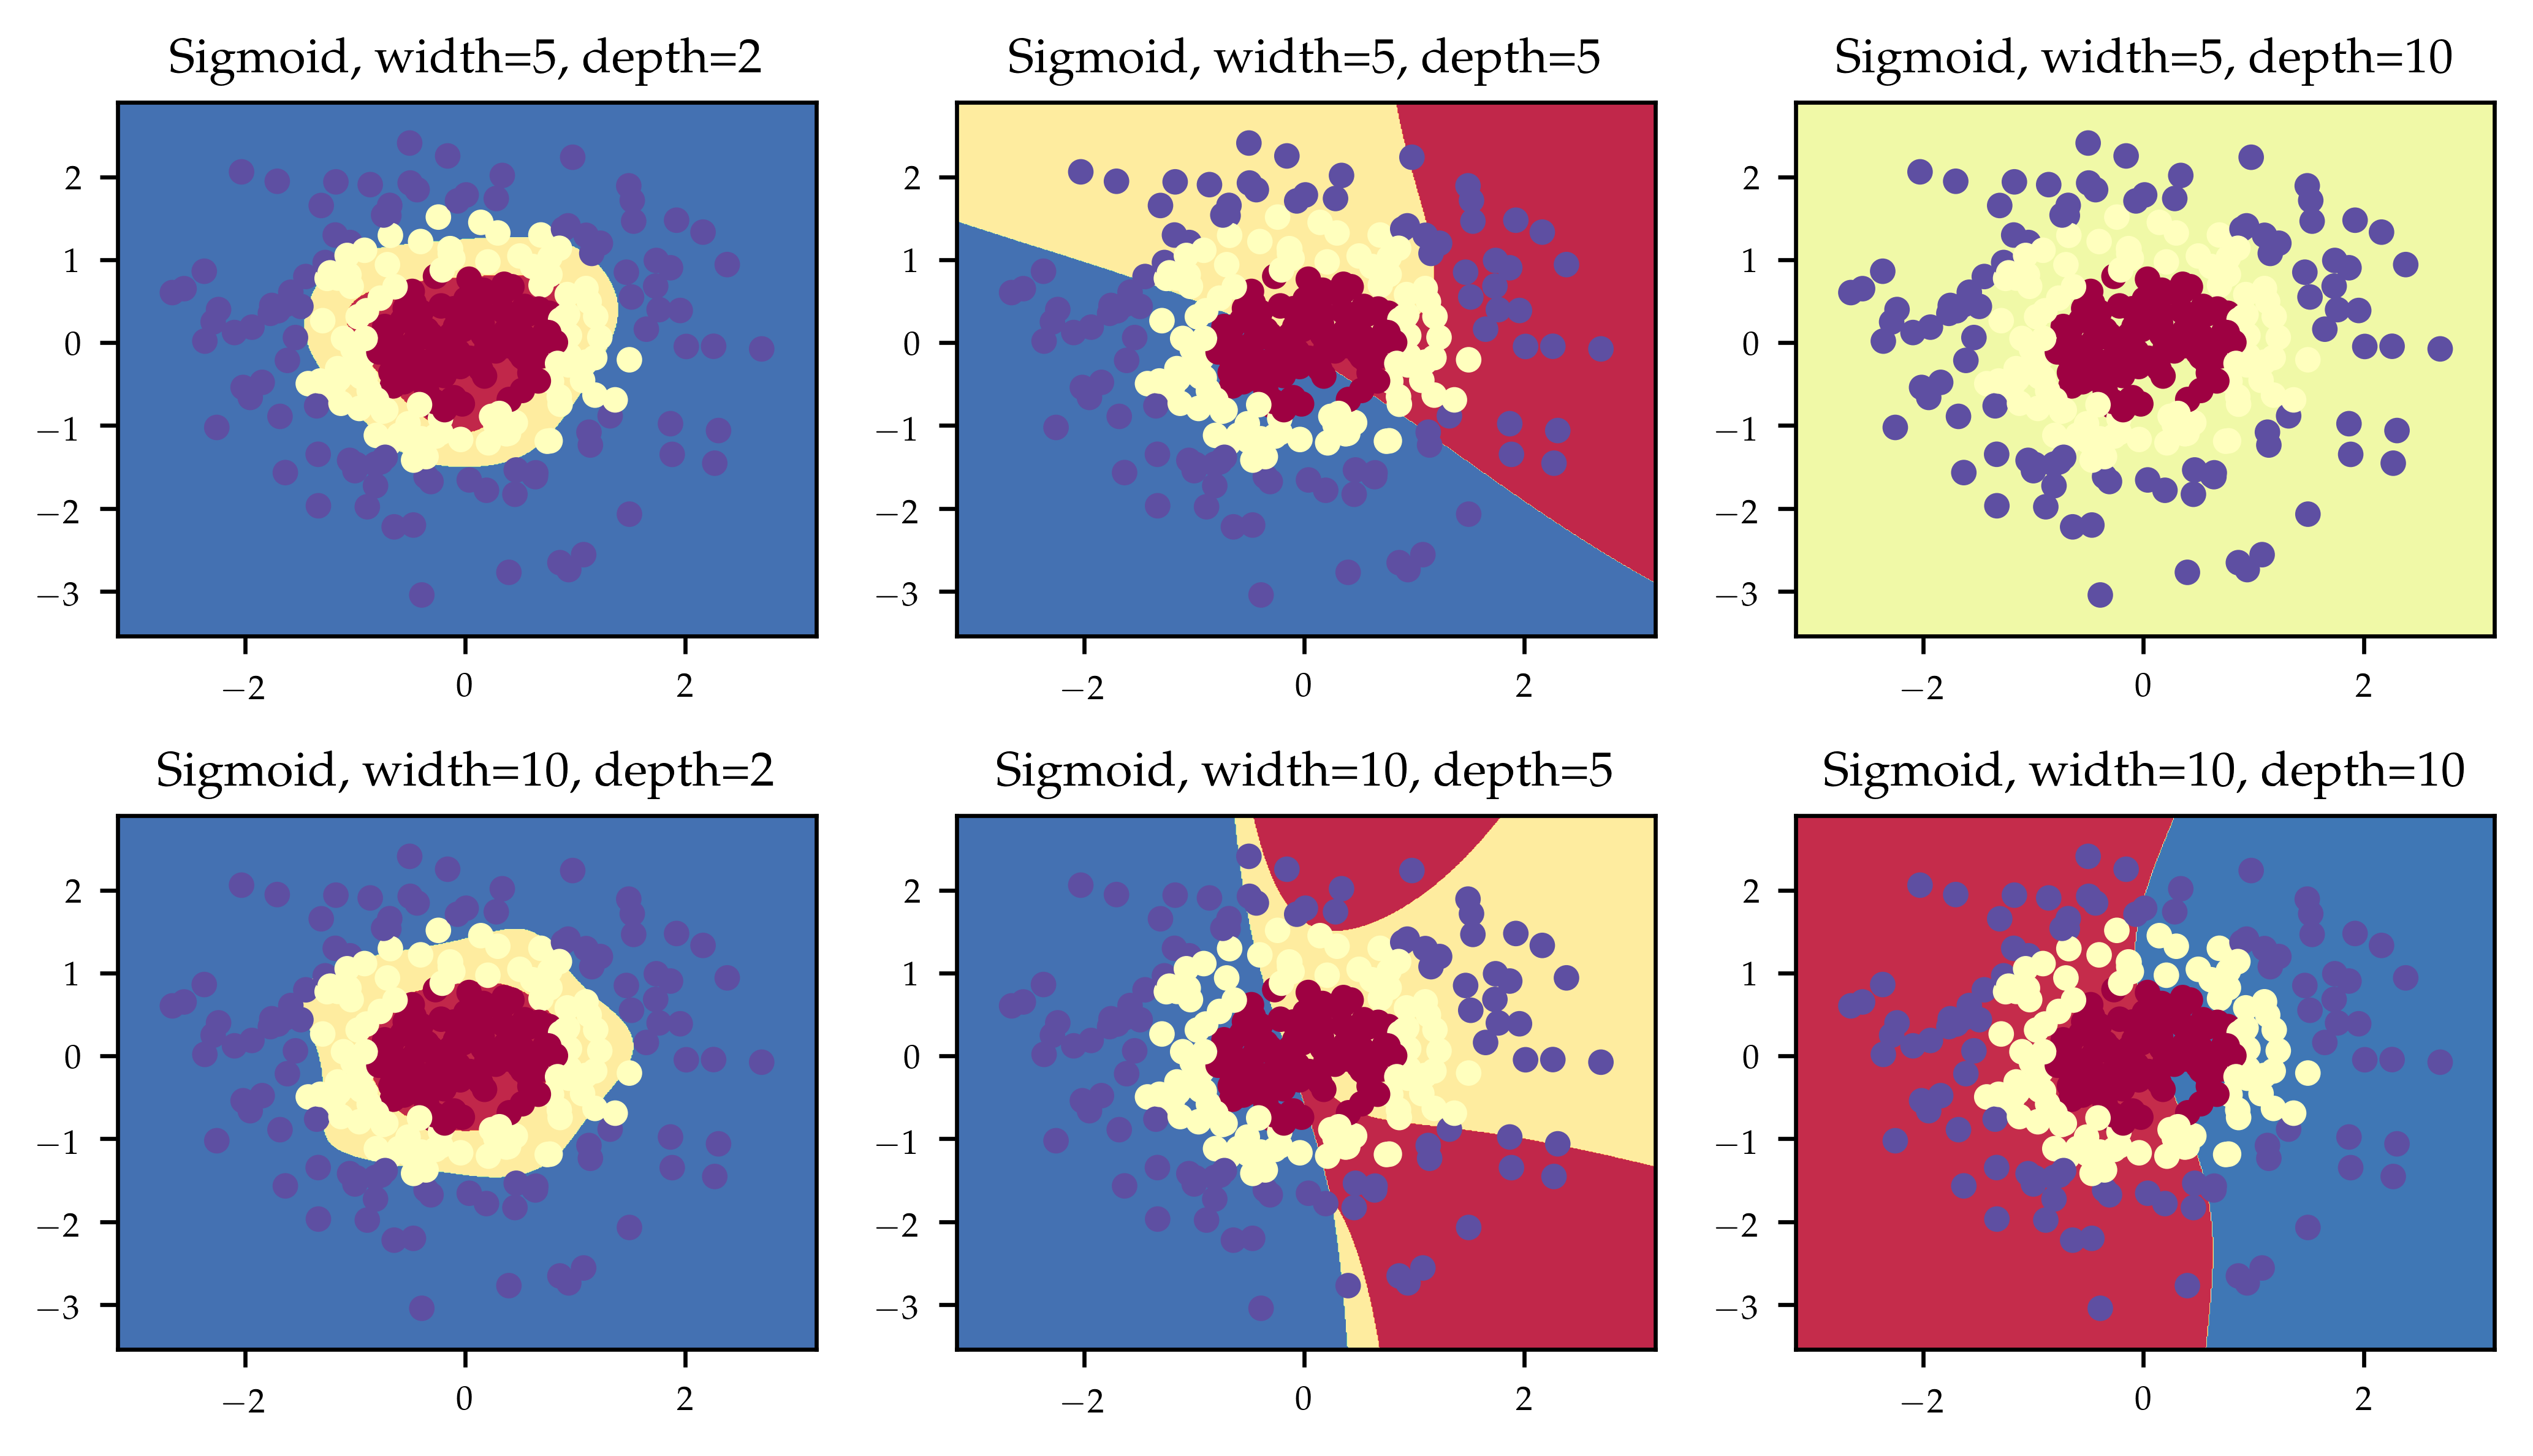

Loss after iteration 0: 1.334852
Loss after iteration 1000: 0.232685
Loss after iteration 2000: 0.143939
Loss after iteration 3000: 0.113930
Loss after iteration 4000: 0.099008
Loss after iteration 0: 1.074893
Loss after iteration 1000: 0.058347
Loss after iteration 2000: 0.035198
Loss after iteration 3000: 0.029306
Loss after iteration 4000: 0.030093
Loss after iteration 0: 1.099046
Loss after iteration 1000: 1.091167
Loss after iteration 2000: 0.159433
Loss after iteration 3000: 0.110423
Loss after iteration 4000: 0.092792
Loss after iteration 0: 1.431074
Loss after iteration 1000: 0.210967
Loss after iteration 2000: 0.129780
Loss after iteration 3000: 0.097755
Loss after iteration 4000: 0.079074
Loss after iteration 0: 1.116619
Loss after iteration 1000: 0.040011
Loss after iteration 2000: 0.019021
Loss after iteration 3000: 0.011173
Loss after iteration 4000: 0.005035
Loss after iteration 0: 1.098519
Loss after iteration 1000: 0.048319
Loss after iteration 2000: 0.002172
Loss after

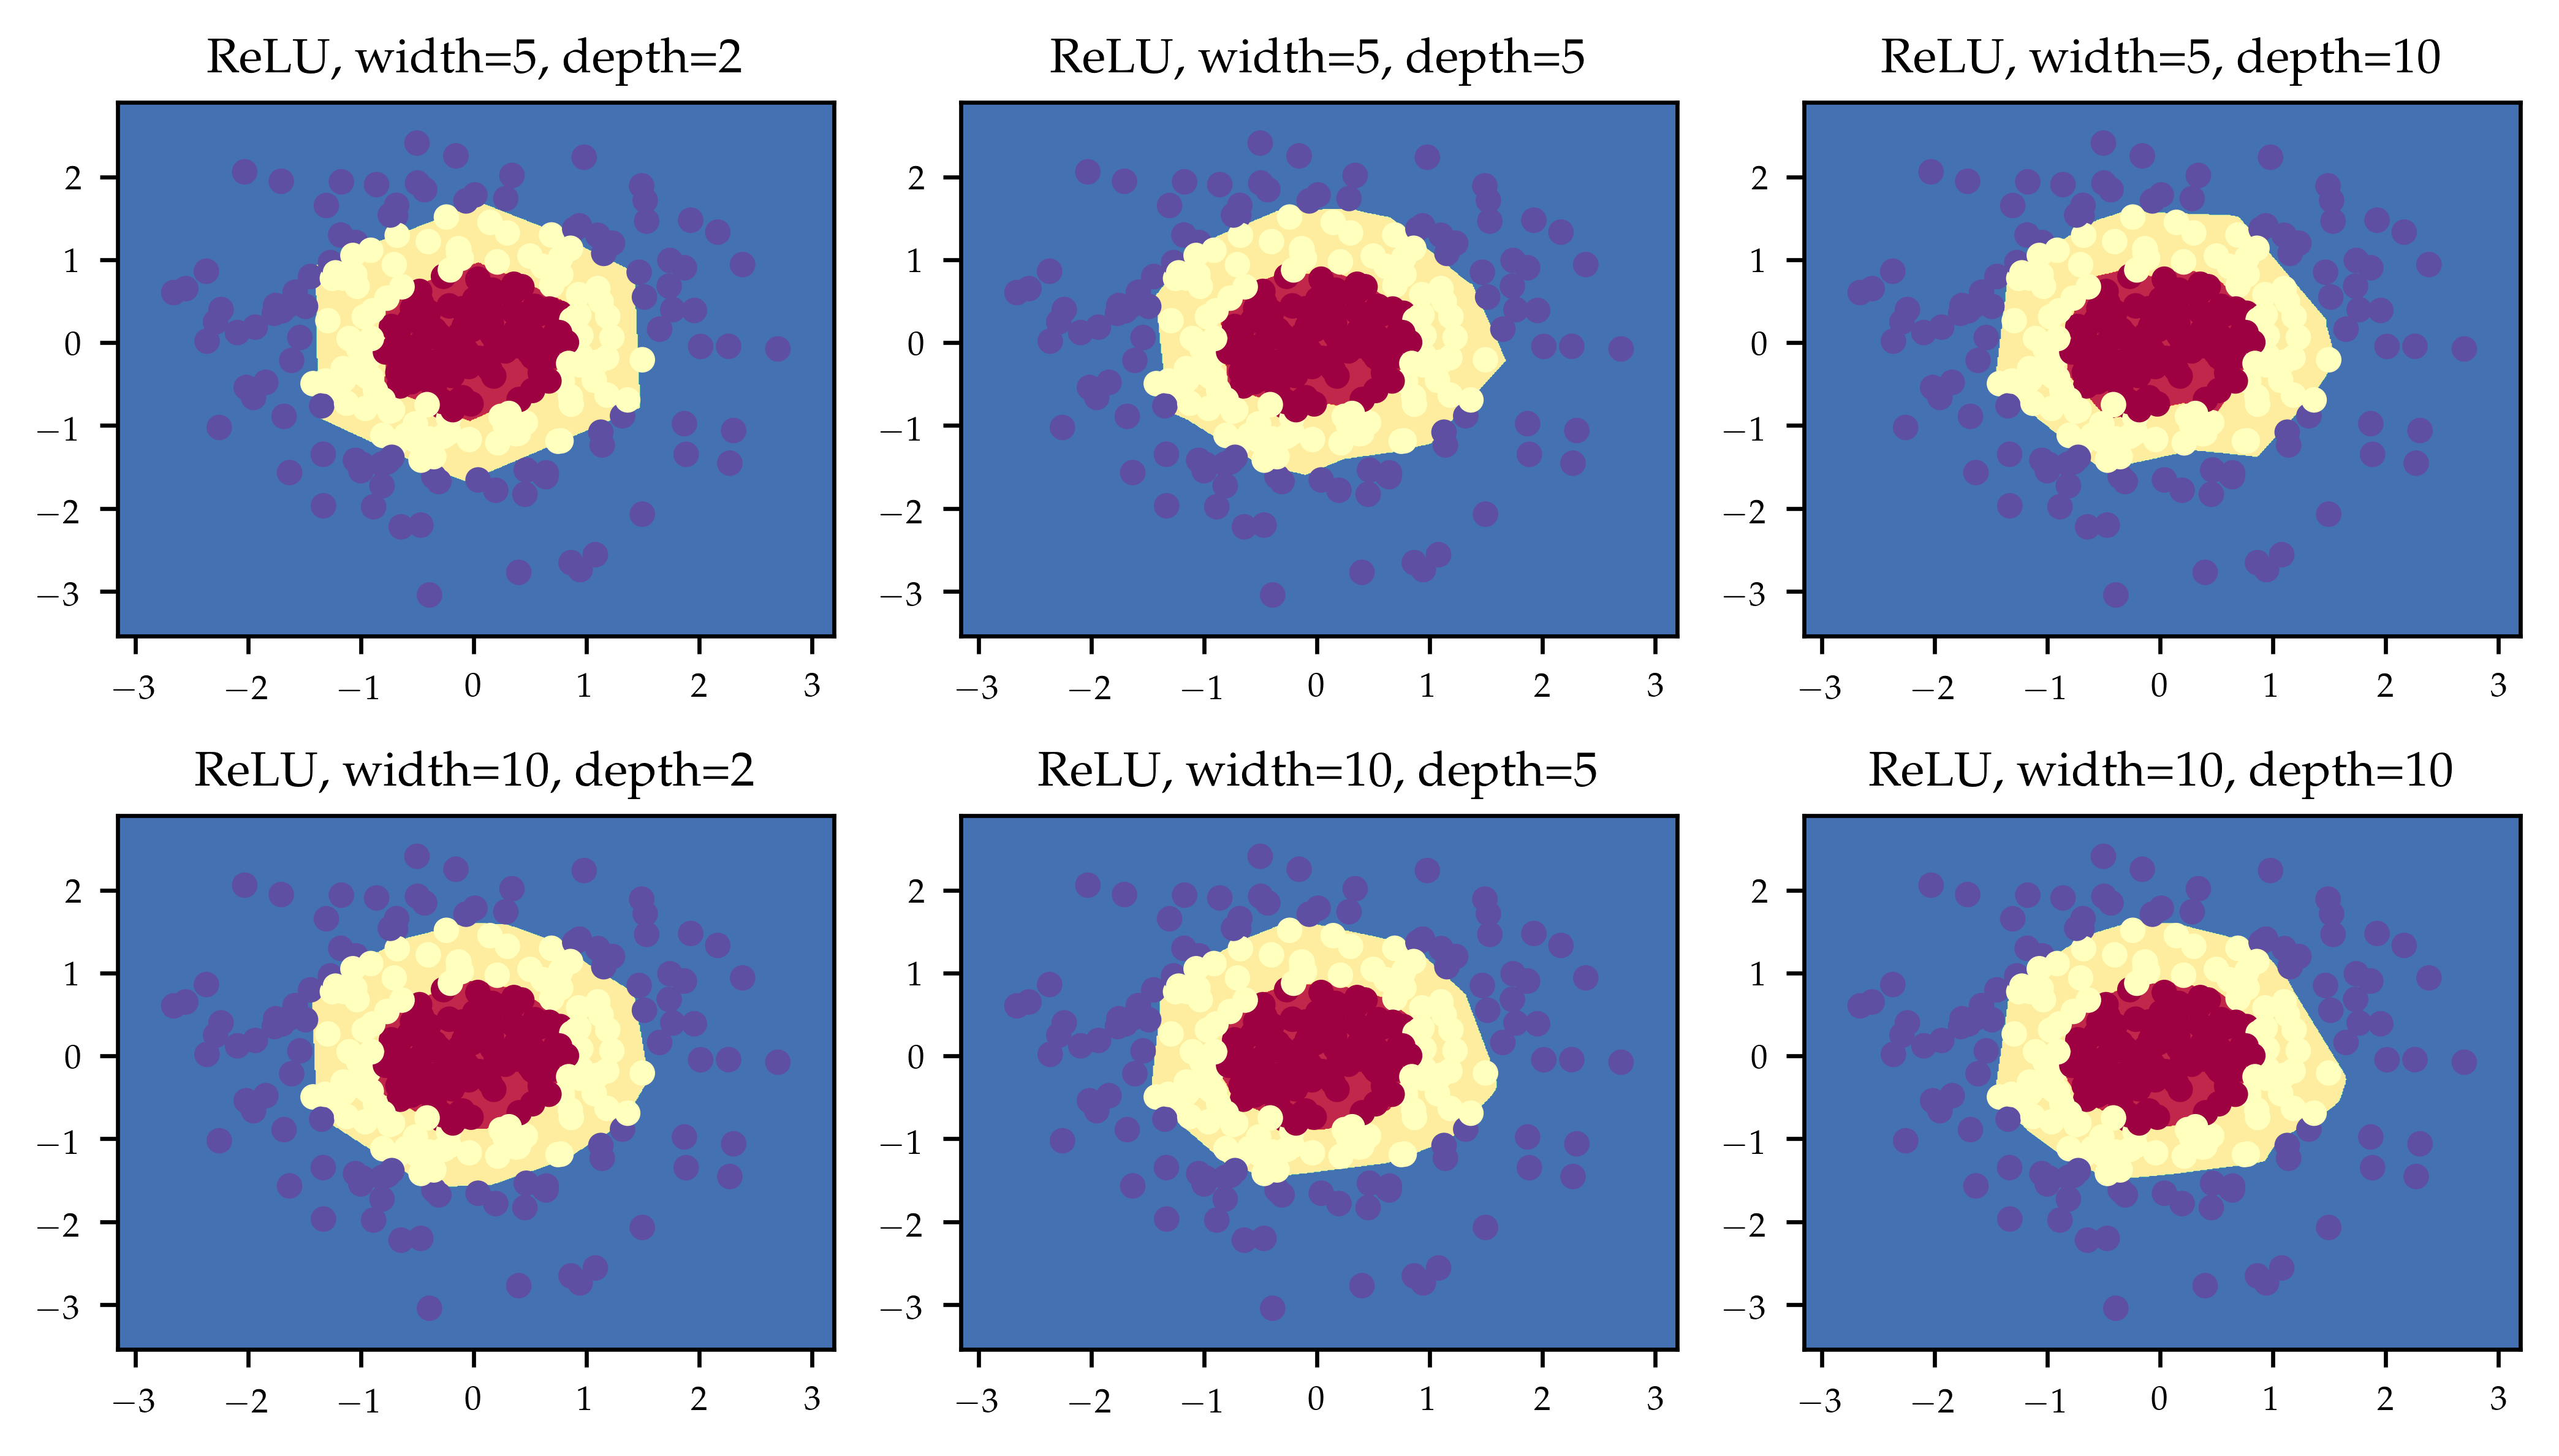

In [5]:
from sklearn.datasets import make_gaussian_quantiles

X2, y2 = make_gaussian_quantiles(n_samples=300, n_features=2, n_classes=3, random_state=0)

activations = ['Tanh', 'Sigmoid', 'ReLU']
layer_widths = [5, 10]
depths = [2, 5, 10]

for k, activation in enumerate(activations):
    
    if activation == 'Tanh':
        activation_cls = ActivationFunctions.Tanh
    elif activation == 'Sigmoid':
        activation_cls = ActivationFunctions.Sigmoid
    elif activation == 'ReLU':
        activation_cls = ActivationFunctions.ReLU
        
    plt.figure(figsize=(7, 4))
    
    for (i, layer_width), (j, depth) in product(enumerate(layer_widths), enumerate(depths)):
        model = DeepNeuralNetwork(input_dim=2, layer_specs=[(layer_width, activation_cls()) for _ in range(depth-1)] + [(3, ActivationFunctions.Softmax())], loss=Losses.CrossEntropy(), reg_penalty=1e-5, seed=0)
        model.train(X2, y2, step_size=1e-1, epochs=5000, verbose=True)
        
        plt.subplot(len(layer_widths), len(depths), i*len(depths)+j+1)
        plot_decision_boundary(lambda X: np.argmax(model.feedforward(X), 1), X2, y2)
        plt.title('%s, width=%d, depth=%d' % (activation, layer_width, depth))
                    
    plt.tight_layout()
    plt.show()

This dataset is randomly generated Gaussian in two dimensions divided into three classes based on quantiles of the pdf. The behavior here is similar in many aspects as in the moons dataset, which I will not recount. I will point out that for this dataset, the ReLU nets seems to overfit much less than the tanh nets, producing much nicer decision boundaries across depth levels and widths.

# Task 2.

## Part (a).

### Parts (1) – (4).

See `weight_variable()`, `bias_variable()`, `conv2d()`, `max_pool_2x2()`, and `main()` in `dcn_mnist.py` for implementation.

### Part (5).

See `main_2a()` in `dcn_mnist.py` for implementation. I will omit the full output of the command below since it is quite lengthy; however, I include a the tail of the output which contains the requested information.

In [11]:
import dcn_mnist

dcn_mnist.main_2a()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.08
step 100, training accuracy 0.16
step 200, training accuracy 0.4
step 300, training accuracy 0.42
step 400, training accuracy 0.4
step 500, training accuracy 0.48
step 600, training accuracy 0.52
step 700, training accuracy 0.76
step 800, training accuracy 0.72
step 900, training accuracy 0.7
step 1000, training accuracy 0.72
step 1100, training accuracy 0.62
step 1200, training accuracy 0.74
step 1300, training accuracy 0.68
step 1400, training accuracy 0.82
step 1500, training accuracy 0.82
step 1600, training accuracy 0.82
step 1700, training accuracy 0.78
step 1800, training accuracy 0.84
step 1900, training accuracy 0.82
step 2000, training accuracy 0.8
step 2100, training accuracy 0.84
step 2200, training accuracy 0.78
step 2300, training accuracy 0.82
step 2

Truncated output:

```
...
step 5100, training accuracy 0.88
step 5200, training accuracy 0.84
step 5300, training accuracy 0.96
step 5400, training accuracy 0.86
test accuracy 0.8881
The training takes 23.325989 seconds to finish
```

### Part (6).

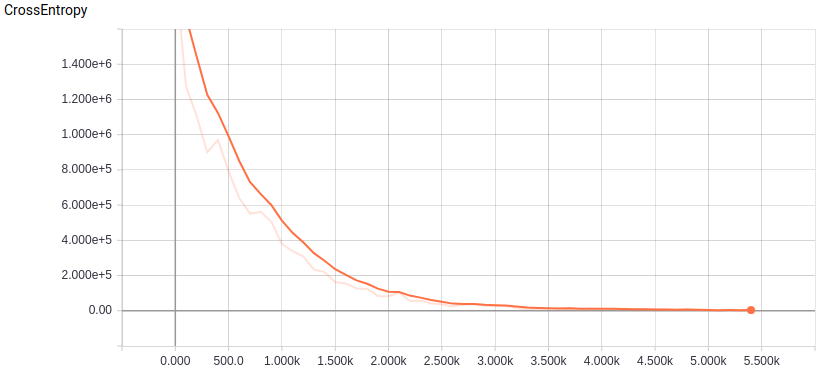

In [12]:
from IPython.display import Image, display

display(Image('fig2a6.png'))

## Part (b).

See `main_general()` in `dcn_mnist.py` for implementation. I will again omit the output of the command below.

In [13]:
dcn_mnist.main_general('2b')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.12
step 100, training accuracy 0.12
step 200, training accuracy 0.16
step 300, training accuracy 0.28
step 400, training accuracy 0.3
step 500, training accuracy 0.48
step 600, training accuracy 0.52
step 700, training accuracy 0.46
step 800, training accuracy 0.56
step 900, training accuracy 0.62
step 1000, training accuracy 0.68
step 1100, training accuracy 0.68
step 1200, training accuracy 0.8
step 1300, training accuracy 0.8
step 1400, training accuracy 0.68
step 1500, training accuracy 0.72
step 1600, training accuracy 0.68
step 1700, training accuracy 0.82
step 1800, training accuracy 0.82
step 1900, training accuracy 0.8
step 2000, training accuracy 0.84
step 2100, training accuracy 0.84
step 2200, training accuracy 0.74
step 2300, training accuracy 0.8
step 24

There were many variables that I kept track of (far too many to include here). However, one plot that I found interesting to visualize was the evolution of the distribution of the bias variables. I include one such plot below, where the bias variables began highly concentrated and spread out considerably.

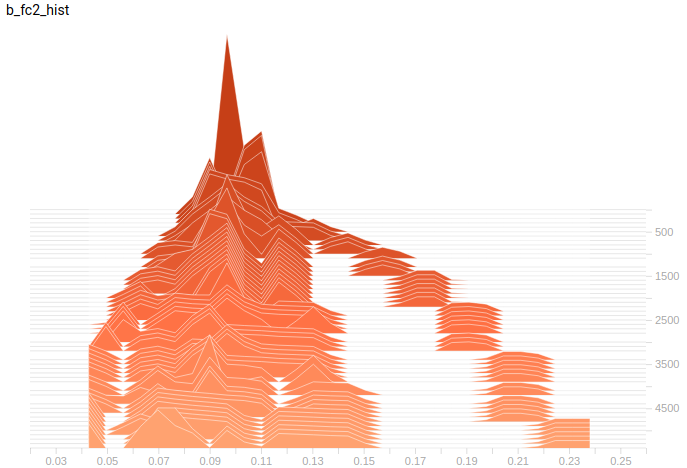

In [14]:
display(Image('fig2b.1.png'))

## Part (c).

As before, I omit the output of the commands below.

In [15]:
from collections import OrderedDict

import tensorflow as tf

nonlinearities = OrderedDict([
    ('relu', tf.nn.relu),
    ('tanh', tf.nn.tanh),
    ('sigmoid', tf.nn.sigmoid),
    ('leaky', lambda x: tf.maximum(0.01*x, x))
])

training_algorithms = OrderedDict([
    ('adam', tf.train.AdamOptimizer(1e-4)),
    ('momentum', tf.train.MomentumOptimizer(1e-4, 0.7)),
    ('sgd', tf.train.GradientDescentOptimizer(1e-4))
])

W_initializers = OrderedDict([
    ('xavier', tf.contrib.layers.xavier_initializer()),
    ('truncnorm', tf.truncated_normal_initializer(0.1))
])

for (nonlinearity_name, nonlinearity), (training_algorithm_name, training_algorithm), (W_initializer_name, W_initializer) in product(nonlinearities.items(), training_algorithms.items(), W_initializers.items()):
    jobid = '2c_%s_%s_%s' % (nonlinearity_name, training_algorithm_name, W_initializer_name)
    print(jobid)
    dcn_mnist.main_general(jobid, nonlinearity=nonlinearity, training_algorithm=training_algorithm, W_initializer=W_initializer)

2c_relu_adam_xavier
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.14
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.96
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.92
step 1000, training accuracy 0.96
step 1100, training accuracy 1
step 1200, training accuracy 0.96
step 1300, training accuracy 0.9
step 1400, training accuracy 0.98
step 1500, training accuracy 1
step 1600, training accuracy 0.96
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 0.96
step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accura

step 4900, training accuracy 0.08
step 5000, training accuracy 0.1
step 5100, training accuracy 0.16
step 5200, training accuracy 0.08
step 5300, training accuracy 0.1
step 5400, training accuracy 0.04
test accuracy 0.1135
The training takes 27.792011 seconds to finish
2c_relu_sgd_xavier
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.14
step 100, training accuracy 0.12
step 200, training accuracy 0.22
step 300, training accuracy 0.16
step 400, training accuracy 0.18
step 500, training accuracy 0.08
step 600, training accuracy 0.12
step 700, training accuracy 0.28
step 800, training accuracy 0.28
step 900, training accuracy 0.26
step 1000, training accuracy 0.3
step 1100, training accuracy 0.4
step 1200, training accuracy 0.36
step 1300, training accuracy 0.4
step 1400, training accuracy 0.38
step 1500, training ac

step 4100, training accuracy 0.12
step 4200, training accuracy 0.06
step 4300, training accuracy 0.12
step 4400, training accuracy 0.14
step 4500, training accuracy 0.08
step 4600, training accuracy 0.18
step 4700, training accuracy 0.14
step 4800, training accuracy 0.12
step 4900, training accuracy 0.18
step 5000, training accuracy 0.12
step 5100, training accuracy 0.08
step 5200, training accuracy 0.04
step 5300, training accuracy 0.08
step 5400, training accuracy 0.1
test accuracy 0.0982
The training takes 29.622711 seconds to finish
2c_tanh_momentum_xavier
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.06
step 100, training accuracy 0.12
step 200, training accuracy 0.22
step 300, training accuracy 0.24
step 400, training accuracy 0.46
step 500, training accuracy 0.52
step 600, training accuracy 0.54
step 700, 

step 3200, training accuracy 0.14
step 3300, training accuracy 0.1
step 3400, training accuracy 0.14
step 3500, training accuracy 0.1
step 3600, training accuracy 0.2
step 3700, training accuracy 0.08
step 3800, training accuracy 0.18
step 3900, training accuracy 0.06
step 4000, training accuracy 0.04
step 4100, training accuracy 0.04
step 4200, training accuracy 0.1
step 4300, training accuracy 0.06
step 4400, training accuracy 0.14
step 4500, training accuracy 0.04
step 4600, training accuracy 0.14
step 4700, training accuracy 0.12
step 4800, training accuracy 0.08
step 4900, training accuracy 0.04
step 5000, training accuracy 0.24
step 5100, training accuracy 0.12
step 5200, training accuracy 0.08
step 5300, training accuracy 0.14
step 5400, training accuracy 0.12
test accuracy 0.1135
The training takes 27.457262 seconds to finish
2c_sigmoid_adam_xavier
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images

step 2300, training accuracy 0.12
step 2400, training accuracy 0.1
step 2500, training accuracy 0.08
step 2600, training accuracy 0.2
step 2700, training accuracy 0.14
step 2800, training accuracy 0.14
step 2900, training accuracy 0.04
step 3000, training accuracy 0.04
step 3100, training accuracy 0.16
step 3200, training accuracy 0.12
step 3300, training accuracy 0.08
step 3400, training accuracy 0.04
step 3500, training accuracy 0.14
step 3600, training accuracy 0.1
step 3700, training accuracy 0.16
step 3800, training accuracy 0.06
step 3900, training accuracy 0.08
step 4000, training accuracy 0.14
step 4100, training accuracy 0.16
step 4200, training accuracy 0.14
step 4300, training accuracy 0.04
step 4400, training accuracy 0.1
step 4500, training accuracy 0.08
step 4600, training accuracy 0.12
step 4700, training accuracy 0.12
step 4800, training accuracy 0.06
step 4900, training accuracy 0.06
step 5000, training accuracy 0.06
step 5100, training accuracy 0.08
step 5200, trainin

step 1500, training accuracy 0.68
step 1600, training accuracy 0.84
step 1700, training accuracy 0.8
step 1800, training accuracy 0.8
step 1900, training accuracy 0.8
step 2000, training accuracy 0.74
step 2100, training accuracy 0.76
step 2200, training accuracy 0.74
step 2300, training accuracy 0.88
step 2400, training accuracy 0.76
step 2500, training accuracy 0.74
step 2600, training accuracy 0.86
step 2700, training accuracy 0.78
step 2800, training accuracy 0.8
step 2900, training accuracy 0.96
step 3000, training accuracy 0.74
step 3100, training accuracy 0.86
step 3200, training accuracy 0.82
step 3300, training accuracy 0.8
step 3400, training accuracy 0.78
step 3500, training accuracy 0.7
step 3600, training accuracy 0.76
step 3700, training accuracy 0.86
step 3800, training accuracy 0.84
step 3900, training accuracy 0.86
step 4000, training accuracy 0.86
step 4100, training accuracy 0.86
step 4200, training accuracy 0.78
step 4300, training accuracy 0.78
step 4400, training 

step 500, training accuracy 0.14
step 600, training accuracy 0.12
step 700, training accuracy 0.14
step 800, training accuracy 0.22
step 900, training accuracy 0.16
step 1000, training accuracy 0.24
step 1100, training accuracy 0.26
step 1200, training accuracy 0.22
step 1300, training accuracy 0.22
step 1400, training accuracy 0.22
step 1500, training accuracy 0.22
step 1600, training accuracy 0.22
step 1700, training accuracy 0.2
step 1800, training accuracy 0.12
step 1900, training accuracy 0.28
step 2000, training accuracy 0.26
step 2100, training accuracy 0.34
step 2200, training accuracy 0.22
step 2300, training accuracy 0.18
step 2400, training accuracy 0.26
step 2500, training accuracy 0.28
step 2600, training accuracy 0.22
step 2700, training accuracy 0.22
step 2800, training accuracy 0.18
step 2900, training accuracy 0.22
step 3000, training accuracy 0.26
step 3100, training accuracy 0.32
step 3200, training accuracy 0.26
step 3300, training accuracy 0.26
step 3400, training 

Across all activations I tried here, the combination of Xavier initialization and the Adam optimizer was a huge success. Here is a plot of the test accuracy for the combination of ReLU activations, Xavier initialization, and Adam optimizer:

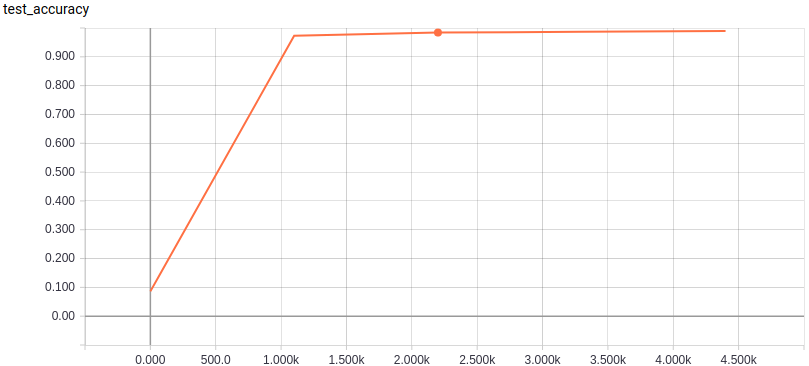

In [16]:
display(Image('fig2c.1.png'))

In comparison, for most activation functions and optimization strategies, truncated normal initialization failed to converge to anything close to a good solution. Consider this objective function plot for the combination of sigmoid activation, Adam optimizer, and truncated normal initialization, along with the test error:

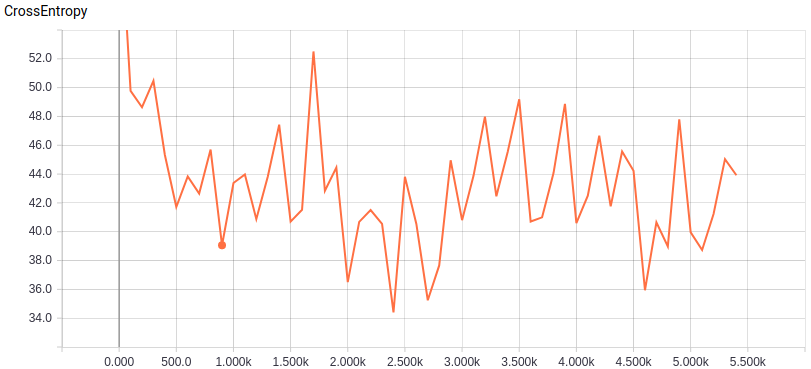

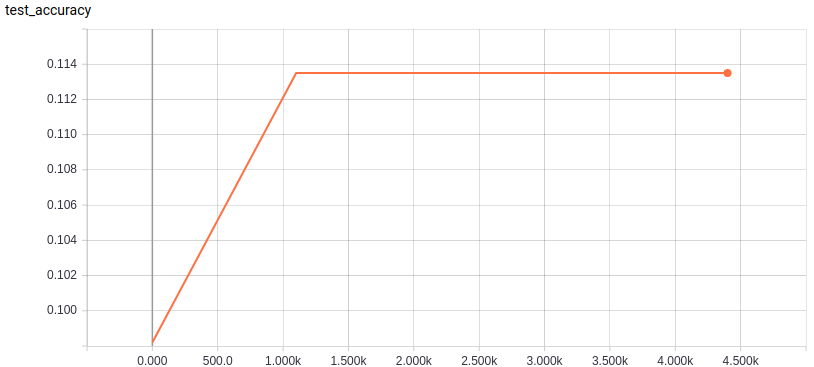

In [17]:
display(Image('fig2c.2.png'))
display(Image('fig2c.3.png'))

Momentum and SGD methods in general were not huge successes, performing (at best) about as well as the network from part 2(a).